<center>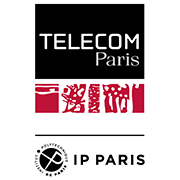</center>

<h1><center><strong>Semantic Textual Similarity (STS) project</strong></center></h1>

<center>
<h3> Project Supervisor: Aina Garí Soler</a></h3>
<email>aina.garisoler@telecom-paris.fr</email>  <br/>
Year 2024-2025
</center>




## What is Semantic Textual Similarity (STS)?

Semantic Textual Similarity (STS) measures the degree of semantic equivalence between two texts. As an NLP task, it typically consists in determining, for two sentences $s_1$ and $s_2$, how similar they are in meaning. Systems must output a continous score $p$ between, for example, 0 (completely unrelated) and 1 (meaning-equivalent). For example, for these two unrelated sentences, $p$ should be close to 0:

$s_1$: *The black dog is running through the snow.*

$s_2$: *A race car driver is driving his car through the mud.*

### Why is it important?

There are several NLP applications that can directly benefit from STS predictions. Here are some examples:
- Evaluation of **Automatic Summarization** and **Machine Translation** models. These models must output sentences in natural language preserving the meaning of a reference text (the text to be summarized / translated);
- **Information Retrieval**: for checking the semantic equivalence between a query and a potential match;
- **Plagiarism detection**: for locating passages that are similar in content and potentially contain plagiarism.
- **Sentence representation evaluation**: evaluating the quality of sentence embeddings and understanding what information they encode.

### Why is it hard?

**TL;DR**: Because there are different ways of saying the same thing, and there are subtle ways of saying radically different things.

Solving this task involves multiple kinds of non-trivial linguistic knowledge. Relying on counting the common words between $s_1$ and $s_2$ works to some extent, but it is not enough. The example below (taken from [Landauer et al., 1997](http://cetus.stat.cmu.edu/~cshalizi/350/2008/readings/Landauer-Dumais.pdf)), with a very high word overlap, illustrates this. The relations between words in a sentence are also important.

$s_1$: *It was not the sales manager who hit the bottle that day, but the office worker with the serious drinking problem.*

$s_2$: *That day the office manager, who was drinking, hit the problem sales worker with a bottle, but it was not serious.*


<p align="left">
  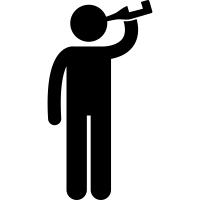


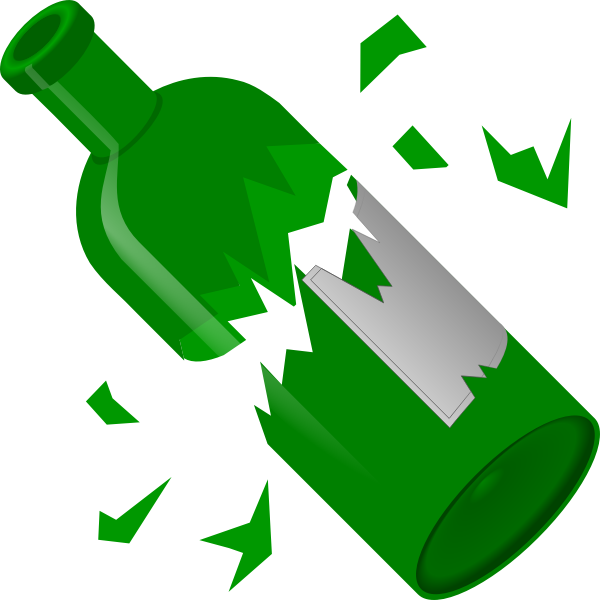



</p>

In fact, people may often refer to the same thing using different words (**synonyms**, like *happy* and *glad*, or **hypernyms**, like *animal* for *dog*).

$s_1$: *I'm happy I managed to fix my dad's bike*

$s_2$: *I'm glad I could repair my father's bicycle*

  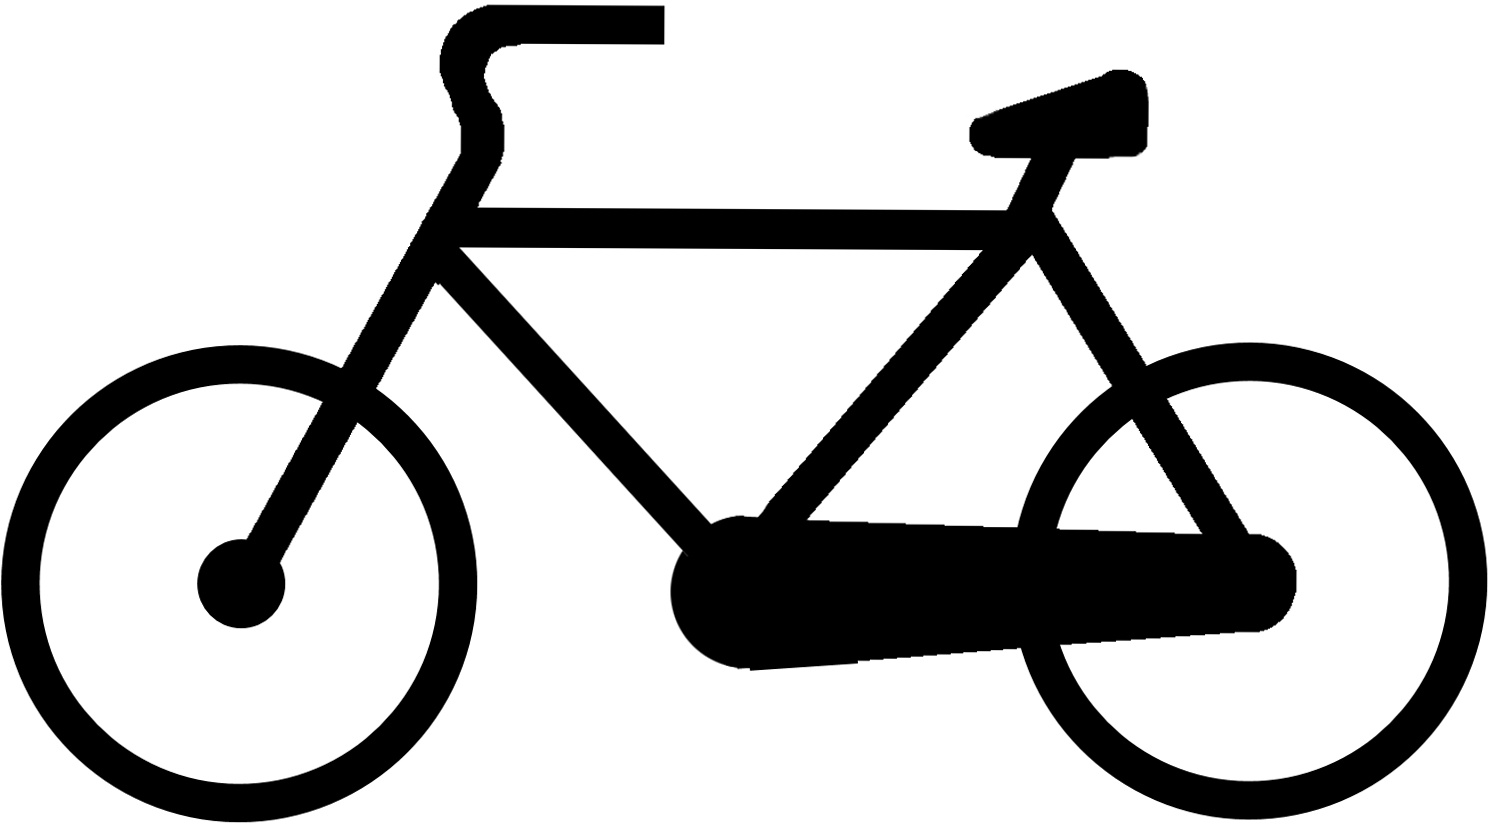

The simple addition of one word can change a situation completely:

$s_1$: *I enjoyed watching the stars* (⭐)

$s_2$: *I enjoyed watching the **TV** stars* (👩‍🎤)

## SemEval Workshop: Semantic Evaluation Challenges

[SemEval](https://semeval.github.io/) is a series of international workshops that proposes, every year, a number of NLP challenges. These challenges (or "shared tasks") target different tasks, all related to semantics. Teams participate by submitting their models, and optionally may write a paper describing their approach. The organizers of each task publish a paper describing the data used, and summarize the participating approaches and their results.

There have been multiple editions of STS tasks, each with a different dataset:
- [SemEval-2012 Task 6: A Pilot on Semantic Textual Similarity](https://aclanthology.org/S12-1051.pdf)
- [*SEM 2013 shared task: Semantic Textual Similarity](https://aclanthology.org/S13-1004.pdf)
- [SemEval-2014 Task 10: Multilingual Semantic Textual Similarity](https://aclanthology.org/S14-2010.pdf)
-[SemEval-2015 Task 2: Semantic Textual Similarity,
English, Spanish and Pilot on Interpretability](https://aclanthology.org/S15-2045.pdf)
- [SemEval-2015 Task 1: Paraphrase and Semantic Similarity in Twitter (PIT)](https://aclanthology.org/S15-2001.pdf)
- [SemEval-2016 Task 1: Semantic Textual Similarity,
Monolingual and Cross-Lingual Evaluation](https://aclanthology.org/S16-1081.pdf)
- [SemEval-2017 Task 1: Semantic Textual Similarity
Multilingual and Cross-lingual Focused Evaluation](https://aclanthology.org/S17-2001.pdf)


For a summary of most of these tasks, including the datasets, you can visit [**this wiki**](http://ixa2.si.ehu.eus/stswiki/index.php/Main_Page).

For this project, you will work on solving this task using some of the datasets proposed in these SemEval challenges. You will use different kinds of features, and may find inspiration for your models in the papers above.


# Overview of the project

Every team will work on at least 3 kinds of models to solve the standard English STS task:
### Common part
1. A traditional ML model relying on simple linguistic and textual features;
2. A traditional ML model relying on word representations;
3. (Already implemented) A Siamese Bidirectional Long Short-Term Memory Network (BiLSTM) that computes sentence representations.

For (1), you will be asked to use some specific features and will be given hints on other (kinds of) features that you may want to try. You are also expected to check the bibliography to come up with potentially useful features.
For model (2), you will mostly be asked to complete portions of code.
In (3), the model will already be given to you, and the focus will be on analyzing its results.

You are not expected to obtain outstanding results. The goal is rather for you to learn how to solve an NLP task using different approaches and to reflect on pre-processing as well as on the results obtained (do worry, though, if your results are all close to 0!)

### Team-specific part

Each team will be assigned to Exercise A, B or C. These team-specific exercises are presented at the end of the notebook.

-------------------------------

**Places where you need to write code are marked with "## TO COMPLETE"**

**Recommendation**: Before you start working on the project, go through the notebook one time together to have a global vision of what is expected and how the different parts are related to each other.

## About the report
* When presenting results include a table or a plot, describe them and explain them. You should answer the questions in the "reflection" sections that you will find throughout this notebook.
* Make sure to clearly describe, and refer to, every configuration tested, including all the information necessary. The report should be independent from the notebook.
* If appropriate/necessary, do not hesitate to include formulas.





# Let's start! Common part

### Installations

In [ ]:
!pip install POT
! pip install gensim
! pip install pyemd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.6/865.6 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.6/662.6 kB 11.3 MB/s eta 0:00:00


In [23]:
import os
import re
import copy
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gensim.downloader as api
import seaborn as sns

from gensim.corpora.dictionary import Dictionary
import pyemd
from pyemd import emd
from gensim.models import KeyedVectors

from nltk.corpus import wordnet
from nltk.corpus import stopwords
from collections import Counter
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from string import punctuation
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity , euclidean_distances
from scipy.spatial.distance import cosine, euclidean


from sklearn.metrics import jaccard_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, spearmanr

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor




In [24]:
# Téléchargez les ressources nécessaires
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('universal_tagset')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True



## STSBenchmark Dataset

For models 1 and 2 we will use the STSBenchmark, which contains portions of the datasets used in different STS tasks between 2012 and 2017. You can download it using [this link](http://ixa2.si.ehu.es/stswiki/images/4/48/Stsbenchmark.tar.gz). The dataset comes with a pre-defined train/dev/test split.

You can find more details about this benchmark on [this wiki](http://ixa2.si.ehu.eus/stswiki/index.php/STSbenchmark).

Download the dataset, get acquainted with its format, upload it to Colab and load it using the function below.



In [25]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [41]:
! tar -xvzf Stsbenchmark.tar.gz

stsbenchmark/
stsbenchmark/readme.txt
stsbenchmark/sts-test.csv
stsbenchmark/correlation.pl
stsbenchmark/LICENSE.txt
stsbenchmark/sts-dev.csv
stsbenchmark/sts-train.csv


In [42]:
def load_data():
  data = dict()
  for fn in os.listdir("stsbenchmark"):
    if fn.endswith(".csv"):
      with open("stsbenchmark/" + fn) as f:
        subset = fn[:-4].split("-")[1]
        #print(subset)
        data[subset] = dict()
        data[subset]['data'] = []
        data[subset]['scores'] = []
        for l in f:
          #genre filename year score sentence1 sentence2 (and sources, sometimes)
          l = l.strip().split("\t")
          data[subset]['data'].append((l[5],l[6]))
          data[subset]['scores'].append(float(l[4]))
  return data

dataset = load_data()

### Having a look at the data...

print("Some examples from the dataset:")
for i in range(5):
  print("s1:", dataset['train']['data'][i][0])
  print("s2:", dataset['train']['data'][i][1])
  print("score:", dataset['train']['scores'][i], "\n")

print("\nNumber of sentence pairs by subset:")
for subset in dataset:
  print(subset, len(dataset[subset]['data']))

print("\nRange of scores in the training set:", min(dataset["train"]["scores"]), "-", max(dataset["train"]["scores"]))


Some examples from the dataset:
s1: A plane is taking off.
s2: An air plane is taking off.
score: 5.0 

s1: A man is playing a large flute.
s2: A man is playing a flute.
score: 3.8 

s1: A man is spreading shreded cheese on a pizza.
s2: A man is spreading shredded cheese on an uncooked pizza.
score: 3.8 

s1: Three men are playing chess.
s2: Two men are playing chess.
score: 2.6 

s1: A man is playing the cello.
s2: A man seated is playing the cello.
score: 4.25 


Number of sentence pairs by subset:
train 5749
test 1379
dev 1500

Range of scores in the training set: 0.0 - 5.0


In [43]:
def calculate_average_sentence_length_by_subset(dataset):

    print("Taille moyenne des paires par subset :")

    for subset in dataset:
        total_s1_length = 0
        total_s2_length = 0
        num_sentences = len(dataset[subset]['data'])

        for s1, s2 in dataset[subset]['data']:
            total_s1_length += len(s1.split())
            total_s2_length += len(s2.split())

        mean_s1 = total_s1_length / num_sentences
        mean_s2 = total_s2_length / num_sentences

        print(f"{subset.capitalize()} S1 = {mean_s1:.2f}   S2 = {mean_s2:.2f}")

calculate_average_sentence_length_by_subset(dataset)

Taille moyenne des paires par subset :
Train S1 = 9.95   S2 = 9.94
Test S1 = 9.82   S2 = 9.80
Dev S1 = 11.42   S2 = 11.34


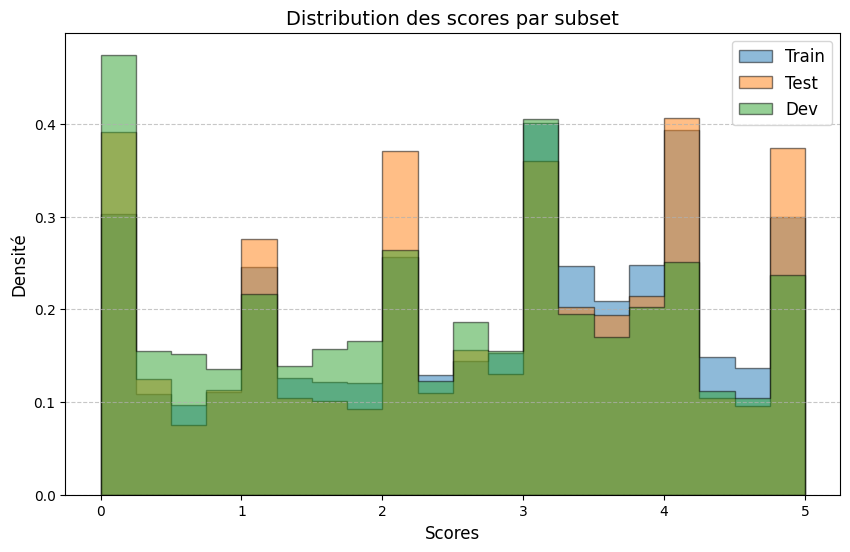

In [44]:
# Fonction pour tracer un graphique de la distribution des scores pour les trois subsets
def plot_score_distribution(dataset):
    """
    Trace la distribution des scores pour les subsets 'train', 'dev', et 'test' sur le même graphique.
    """
    plt.figure(figsize=(10, 6))

    for subset in dataset:
        scores = dataset[subset]['scores']
        plt.hist(scores, bins=20, alpha=0.5, label=f"{subset.capitalize()}",
                 density=True, edgecolor='black', histtype='stepfilled')

    plt.title("Distribution des scores par subset", fontsize=14)
    plt.xlabel("Scores", fontsize=12)
    plt.ylabel("Densité", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_score_distribution(dataset)


## Word count baseline

The very first model you will use is fully implemented. It is a very simple baseline that you can compare to the other models you build. It consists of a Linear Regression model which uses a single feature based on word overlap.

Make sure to keep the performance of the baseline as a reference throughout your experiments, and in the report.


In [45]:
### word overlap baseline
def baseline_features(data):
  x = []
  for s1, s2 in data:
    cv = CountVectorizer(binary=True) # binary=True because we use Jaccard score (we want presence/absence information, not counts)
    vectors = cv.fit_transform([s1,s2]).toarray()
    x.append(jaccard_score(vectors[0], vectors[1]))
  return np.array(x).reshape(-1,1)


## Evaluation

What (kind of) metric do you think could be used for evaluation?

Write a function that evaluates the predictions of a model comparing them to their gold standard.

This function is to be reused throghout the notebook: you should evaluate all models in the same way.

In [46]:

def evaluate(predictions, gold_standard):
  metrics = dict()
  metrics['pearson'] = pearsonr(predictions,gold_standard)[0]
  metrics['mse'] = mean_squared_error(gold_standard, predictions)

  return metrics

In [47]:
# Mapping the scores from the [0,5] to the [0,1] range for convenience
train_y = np.array(dataset['train']['scores']) / 5
dev_y = np.array(dataset['dev']['scores']) / 5
test_y = np.array(dataset['test']['scores']) / 5

train_baseline_x = baseline_features(dataset['train']['data'])
test_baseline_x = baseline_features(dataset['test']['data'])
dev_baseline_x = baseline_features(dataset['dev']['data'])

# Having a look at the features and y
print("5 first baseline feautures ",'\n', train_baseline_x[:5], '\n')
print("5 first labels ",'\n',train_y[:5] , '\n')

print("Checking the correlation of the word overlap feature with the gold standard scores on the training set:", pearsonr(train_baseline_x.squeeze(), train_y)[0])

# Initializing the model
linreg = LinearRegression()
# Training
linreg.fit(train_baseline_x, train_y)
# Predicting
predictions_test = linreg.predict(test_baseline_x)
predictions_dev= linreg.predict(dev_baseline_x)

# Evaluating
# (Since it is the baseline model, we want to report results on the test set too)
baseline_eval_dev = evaluate(predictions_dev, dev_y)
baseline_eval_test = evaluate(predictions_test, test_y)

# show results
baseline_dev_test = pd.DataFrame.from_dict( {'dev' : baseline_eval_dev, 'test': baseline_eval_test})
print("Results obtained on the dev set - test set ")
baseline_dev_test


5 first baseline feautures  
 [[0.66666667]
 [0.8       ]
 [0.6       ]
 [0.66666667]
 [0.83333333]] 

5 first labels  
 [1.   0.76 0.76 0.52 0.85] 

Checking the correlation of the word overlap feature with the gold standard scores on the training set: 0.6116184058994178
Results obtained on the dev set - test set 


,dev,test
pearson,0.666811,0.599766
mse,0.050086,0.060283


## Your turn



## 1. A model using simple linguistic and textual features

Now it's your turn to develop a simple model for the STS task. The model should rely on simple features but without using distributional or distributed representations (for which we will have a dedicated model in (2)). You should:
* 1.1 **Preprocess** the sentences as you deem appropriate:\
[Tokenize](https://www.nltk.org/api/nltk.tokenize.html), lower-case, [remove stopwords](https://scikit-learn.org/stable/modules/feature_extraction.html#using-stop-words)\*... you could also try with [stemming](https://www.nltk.org/howto/stem.html) or [lemmatization](https://www.geeksforgeeks.org/python-lemmatization-with-nltk/), [pos-tagging](https://www.nltk.org/book/ch05.html) or [removing punctuation](https://www.geeksforgeeks.org/string-punctuation-in-python/), for example.
* 1.2 Come up with different kinds of **features**. \
This is the most important part. See below for more details.
* 1.3 **Train** different feature and model combinations on the training set.
* 1.4 **Evaluate** them all on the **development set**.
* 1.5 **Evaluate** the best configuration (i.e. the one which obtained the best result on the development set) on the **test set**.

\* Not all stopwords lists are the same and you might want to adapt yours depending on the application. However, for the sake of simplicity, you can just use the stopwords list provided in NLTK [like shown here](https://awhan.wordpress.com/2016/06/05/scikit-learn-nlp-list-english-stopwords/).

### About the features
**You should implement at least 5 different features**, of which **there must be, at least**:
- One **WordNet**-based feature (for example, does $s_2$ contain synonyms or hypernyms of words in $s_1$? how many of them?) You can use [nltk's wordnet interface](https://www.nltk.org/howto/wordnet.html).
- One **TF-IDF** based feature. You can fit a [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html?highlight=tfidf#sklearn.feature_extraction.text.TfidfVectorizer) on the whole training set, treating a sentence as a document. Then you can calculate the similarity (cosine, euclidean...) between the representations of $s_1$ and $s_2$.
- One more complex **overlap** feature (based on n-gram overlap, $n>1$). You can use the *ngram_range* parameter of [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Your model can, *additionally*, include the word overlap feature used by the baseline model, leaving it as is or modifying it (for example trying cosine similarity).

**Note that certain features may be incompatible with certain kinds of preprocessing.**

More ideas: consider exploiting [the PPDB resource](https://aclanthology.org/S12-1060.pdf), using the overlap of [syntactic roles](https://spacy.io/usage/linguistic-features) or pos-tags, [word alignment](https://aclanthology.org/Q14-1018.pdf) features (for example with [this tool](https://github.com/ma-sultan/monolingual-word-aligner), or something simpler), a Machine Translation evaluation metric (like [BLUE](https://machinelearningmastery.com/calculate-bleu-score-for-text-python/)), the edit distance...

IMPORTANT: You should check the SemEval reports listed at the beginning (for example [this one](https://aclanthology.org/S12-1060.pdf)) or model descriptions (like [this one](https://aclanthology.org/S17-2028.pdf)) to see what features other models have relied on in the past and/or how they were implemented.

### About the models
You can choose what kind of Machine Learning model you want to use from sklearn . You do not need to experiment with multiple models. Just make sure you do not use a classifier: we need a model that outputs continues values (for example, LinearRegression or RandomForestRegression).


NOTE: Empty functions are just there for your orientation, feel free to organize the code as it suits you, adding as many functions as needed.


### 1.1 Preprocessing

In [48]:
#### Preprocess all the data (without lemmatization)
stop_words = set(stopwords.words('english'))
remove_punct=re.compile("[.;:!\'?,\"()\[\]$%ė&ďÄö+*ô“”]")

def preprocess_sentence(sentence):
    sentence=remove_punct.sub("",sentence)
    token=word_tokenize(sentence)
    token_sentence=[w.lower() for w in token if w.lower() not in stop_words]
    return token_sentence

def dataset_preprocess(dataset):
  preprocessed_dataset=[]
  for i in range(len(dataset)):
    for s in dataset[i]:
      data=preprocess_sentence(s)
      preprocessed_dataset.append(data)
  return preprocessed_dataset

In [49]:
### Preprocess all data with lemmatization
def map_universal_tag_to_wordnet(universal_tag):
    if universal_tag == 'NOUN':
        return wordnet.NOUN
    elif universal_tag == 'VERB':
        return wordnet.VERB
    elif universal_tag == 'ADJ':
        return wordnet.ADJ
    elif universal_tag == 'ADV':
        return wordnet.ADV
    else:
        return wordnet.NOUN

def preprocess_dataset(data )-> dict:
  """ Lower case + remove punctuation + lemmatize(optional)  + tokenize """
  lem = WordNetLemmatizer()
  stop_words = set(stopwords.words('english'))
  dataset_preprocess = dict()
  dataset_preprocess = copy.deepcopy(data)

  for subset in ['train', 'test', 'dev']:
    preprocess_data = []
    for s1, s2 in dataset_preprocess[subset]['data']:

      prep_s1 = re.sub(r'[.;:!\'?,\"()\[\]$%ė&ďÄö+*ô“”]', '', s1)
      prep_s2 =re.sub(r'[.;:!\'?,\"()\[\]$%ė&ďÄö+*ô“”]', '', s2)

      tagged_tokens1 = pos_tag(prep_s1.split() , tagset = 'universal')
      tagged_tokens2 = pos_tag(prep_s2.split(), tagset = 'universal')

      lem_s1 = [lem.lemmatize(token , map_universal_tag_to_wordnet(tag)) for token, tag in tagged_tokens1 if token.lower() not in stop_words]
      lem_s2 = [lem.lemmatize(token , map_universal_tag_to_wordnet(tag)) for token, tag in tagged_tokens2 if token.lower() not in stop_words]

      preprocess_data.append([lem_s1 , lem_s2])
    dataset_preprocess[subset]['data'] = preprocess_data
  return dataset_preprocess


In [50]:
def count_negation_phrases(data, subset='train'):
    """
    Compte le nombre de phrases avec et sans négations dans un ensemble donné.
    """
    negations = ["not", "no", "never", "n't"]
    count_with_negation = 0
    count_without_negation = 0

    for s1, s2 in data[subset]['data']:
        # Vérifie si l'une des phrases contient une négation
        s1_has_negation = any(neg in s1.lower() for neg in negations)
        s2_has_negation = any(neg in s2.lower() for neg in negations)

        # Incrémente les compteurs
        if s1_has_negation or s2_has_negation:
            count_with_negation += 1
        else:
            count_without_negation += 1

    return count_with_negation, count_without_negation

# Exemple d'utilisation
count_with_neg, count_without_neg = count_negation_phrases(dataset, subset='train')

print(f"Nombre de paires avec une négation : {count_with_neg}")
print(f"Nombre de paires sans négation : {count_without_neg}")

Nombre de paires avec une négation : 989
Nombre de paires sans négation : 4760


In [51]:
#preprocesse en gardant la negation dans les stops words.
def preprocess_dataset_with_negations(data) -> dict:
    """ Lower case + remove punctuation + lemmatize(optional) + tokenize, while keeping negations """
    lem = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    # Exclure les négations des stopwords
    negations = {"not", "no", "never", "n't"}
    stop_words -= negations

    dataset_preprocess = copy.deepcopy(data)

    for subset in ['train', 'test', 'dev']:
        preprocess_data = []
        for s1, s2 in dataset_preprocess[subset]['data']:
            # Suppression de la ponctuation
            prep_s1 = re.sub(r'[.;:!\'?,\"()\[\]$%ė&ďÄö+*ô“”]', '', s1)
            prep_s2 = re.sub(r'[.;:!\'?,\"()\[\]$%ė&ďÄö+*ô“”]', '', s2)

            # Tokenisation et étiquetage des POS
            tagged_tokens1 = pos_tag(prep_s1.split(), tagset='universal')
            tagged_tokens2 = pos_tag(prep_s2.split(), tagset='universal')

            # Lemmatisation avec conservation des négations
            lem_s1 = [
                lem.lemmatize(token, map_universal_tag_to_wordnet(tag))
                for token, tag in tagged_tokens1
                if token.lower() not in stop_words or token.lower() in negations
            ]
            lem_s2 = [
                lem.lemmatize(token, map_universal_tag_to_wordnet(tag))
                for token, tag in tagged_tokens2
                if token.lower() not in stop_words or token.lower() in negations
            ]

            preprocess_data.append([lem_s1, lem_s2])
        dataset_preprocess[subset]['data'] = preprocess_data

    return dataset_preprocess




In [52]:
# preprocessed datasets

df_prepro=preprocess_dataset(dataset)
df_prepro_neg = preprocess_dataset_with_negations(dataset)

## Creration of individual features

### 1.2 Feature Wordnet

In [53]:
#pour les synonymes
def get_synonyms(word):
    synonyms = set() #pas de doublon
    for synset in wordnet.synsets(word):
        synonyms.update(synset.lemma_names())
    return synonyms

#pour les hyperonymes
def get_hypernyms(word):
    hypernyms = set()
    for synset in wordnet.synsets(word):
        for hypernym in synset.hypernyms():
            hypernyms.update(hypernym.lemma_names())
    return hypernyms

def compute_wordnet_scores(data): # data : dataset[subset]['data]
    syno_score, hypern_score, syno_count, hypern_count = [], [], [], []
    for sentence1, sentence2 in data:  # Parcourt les paires de phrases
        unique_words = set(sentence1 + sentence2)
        num_unique_words = len(unique_words)

        synonym_count = 0
        hypernym_count = 0

        for word1 in sentence1:
            synonyms = get_synonyms(word1)
            hypernyms = get_hypernyms(word1)

            # Compter les synonymes
            if any(word2 in synonyms for word2 in sentence2):
              synonym_count += 1

            # Compter les hyperonymes
            if any(hypernym in sentence2 for hypernym in hypernyms):
              hypernym_count += 1

        # Calcul des scores
        synonym_score = synonym_count / num_unique_words if num_unique_words > 0 else 0
        hypernym_score = hypernym_count / num_unique_words if num_unique_words > 0 else 0

        # Stocker les résultats
        syno_score.append(synonym_score)
        syno_count.append(synonym_count)
        hypern_score.append(hypernym_score)
        hypern_count.append(hypernym_count)

    results= {'synonym_score' : syno_score,
              'hypernym_score' : hypern_score,
              'synonym_count' : syno_count,
              'hypernym_count' : hypern_count}

    return results

In [54]:
def test_compute_wordnet_scores_first_10(dataset_preprocess, dataset_name):
    """
    Teste la fonction compute_wordnet_scores sur les 10 premières paires du dataset prétraité.
    Affiche les paires de phrases et les scores calculés.

    Parameters:
    - dataset_preprocess: dict, le dataset prétraité.
    - dataset_name: str, nom du dataset (pour affichage).
    """
    subset = 'train'
    print(f"\nTesting on dataset '{dataset_name}', subset: '{subset}'\n")


    data = dataset_preprocess[subset]['data']

    data_first_10 = data[:5]

    wordnet_scores = compute_wordnet_scores(data_first_10)

    # Afficher
    for i, (sentence_pair) in enumerate(data_first_10):
        s1, s2 = sentence_pair
        syn_score = wordnet_scores['synonym_score'][i]
        hyper_score = wordnet_scores['hypernym_score'][i]
        syn_count = wordnet_scores['synonym_count'][i]
        hyper_count = wordnet_scores['hypernym_count'][i]
        print(f"Pair {i+1}:")
        print(f"Sentence 1: {' '.join(s1)}")
        print(f"Sentence 2: {' '.join(s2)}")
        print(f"Synonym Score: {syn_score}")
        print(f"Hypernym Score: {hyper_score}")
        print(f"Synonym Count: {syn_count}")
        print(f"Hypernym Count: {hyper_count}")
        print("-" * 50)

test_compute_wordnet_scores_first_10(df_prepro, 'df_prepro')


test_compute_wordnet_scores_first_10(df_prepro_neg, 'df_withneg')




Testing on dataset 'df_prepro', subset: 'train'

Pair 1:
Sentence 1: plane take
Sentence 2: air plane take
Synonym Score: 0.6666666666666666
Hypernym Score: 0.3333333333333333
Synonym Count: 2
Hypernym Count: 1
--------------------------------------------------
Pair 2:
Sentence 1: man play large flute
Sentence 2: man play flute
Synonym Score: 0.75
Hypernym Score: 0.5
Synonym Count: 3
Hypernym Count: 2
--------------------------------------------------
Pair 3:
Sentence 1: man spread shred cheese pizza
Sentence 2: man spread shred cheese uncooked pizza
Synonym Score: 0.8333333333333334
Hypernym Score: 0.3333333333333333
Synonym Count: 5
Hypernym Count: 2
--------------------------------------------------
Pair 4:
Sentence 1: Three men play chess
Sentence 2: Two men play chess
Synonym Score: 0.6
Hypernym Score: 0.2
Synonym Count: 3
Hypernym Count: 1
--------------------------------------------------
Pair 5:
Sentence 1: man play cello
Sentence 2: man seat play cello
Synonym Score: 0.75
Hyp

In [55]:
results = {
    'train': compute_wordnet_scores(df_prepro['train']['data']),
    'dev': compute_wordnet_scores(df_prepro['dev']['data'])
}

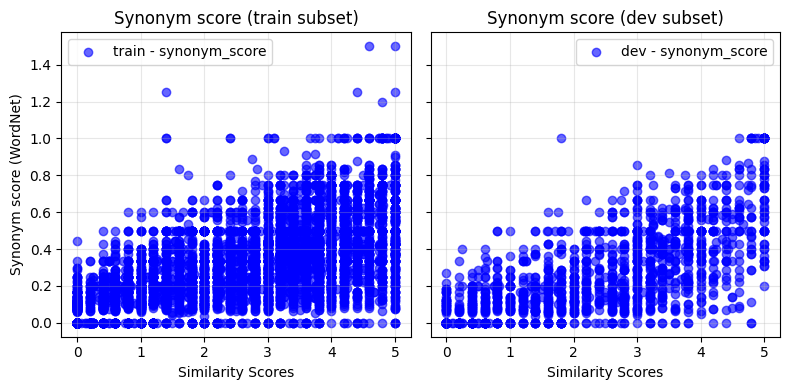

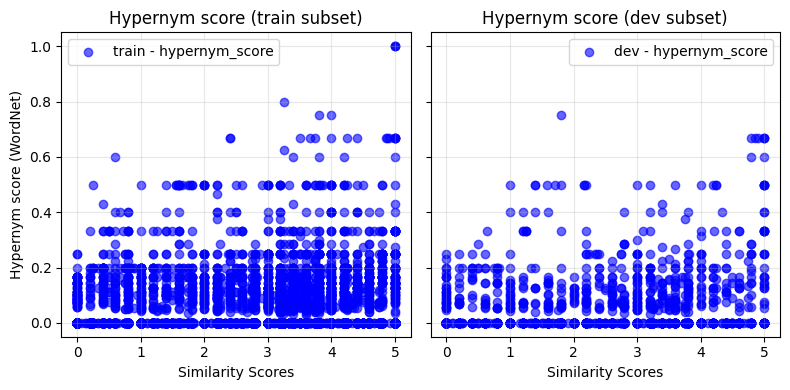

In [56]:
def plot_relation_between_scores_and_similarity(results, dataset_preprocess):
    """
    Trace des scatter plots pour visualiser la relation entre les scores (synonym et hypernym)
    et les scores de similarité des phrases, avec les graphiques 'train' et 'dev' sur la même ligne.

    Args:
        results (dict): Résultats contenant les synonym_scores et hypernym_scores pour chaque subset.
        dataset_preprocess (dict): Données prétraitées contenant les scores de similarité.
    """
    for score_type in ['synonym_score', 'hypernym_score']:
        # Initialiser la figure avec deux sous-graphiques
        fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

        for idx, subset in enumerate(['train', 'dev']):
            # Récupérer les scores
            scores = results[subset][score_type]
            similarity_scores = dataset_preprocess[subset]['scores']  # Scores de similarité

            # Scatter plot pour le subset actuel
            axes[idx].scatter(similarity_scores, scores, alpha=0.6, color='blue', label=f'{subset} - {score_type}')
            axes[idx].set_title(f"{score_type.replace('_', ' ').capitalize()} ({subset} subset)")
            axes[idx].set_xlabel("Similarity Scores")
            axes[idx].grid(alpha=0.3)
            axes[idx].legend()

        # Titre commun pour l'axe Y
        axes[0].set_ylabel(f"{score_type.replace('_', ' ').capitalize()} (WordNet)")

        # Ajustement des espacements
        plt.tight_layout()
        plt.show()

# Tracer les graphiques pour 'train' et 'dev' avec les scores synonymes et hyperonymes
plot_relation_between_scores_and_similarity(results, df_prepro)


### 1.3 Feature Word alignement

In [57]:
# Télécharger le modèle d'embeddings (GloVe)
embedding_model = api.load("glove-wiki-gigaword-300")

[==------------------------------------------------] 4.4% 16.5/376.1MB downloaded

KeyboardInterrupt: 

In [ ]:
def align_word_bidirectional(lem_s1, lem_s2, embedding_model, similarity_threshold, normalize=False):
    # Filtrer les lemmes présents dans le modèle d'embeddings
    lem1 = [lemma for lemma in lem_s1 if lemma in embedding_model]
    lem2 = [lemma for lemma in lem_s2 if lemma in embedding_model]

    if not lem1 or not lem2:
        return 0.0, 0.0, 0.0, 0.0  # Retourner des scores nuls si l'un des ensembles est vide

    # Obtenir les embeddings
    embeddings1 = np.array([embedding_model[lemma] for lemma in lem1])
    embeddings2 = np.array([embedding_model[lemma] for lemma in lem2])

    # Normaliser les embeddings si nécessaire
    if normalize:
        embeddings1 = embeddings1 / np.linalg.norm(embeddings1, axis=1, keepdims=True)
        embeddings2 = embeddings2 / np.linalg.norm(embeddings2, axis=1, keepdims=True)

    # Calculer la matrice de similarité
    similarity_matrix = np.dot(embeddings1, embeddings2.T)

    # Limiter les valeurs de la matrice dans l'intervalle [-1.0, 1.0]
    similarity_matrix = np.clip(similarity_matrix, -1.0, 1.0)

    # Alignement de la phrase 1 vers la phrase 2
    aligned_lemmas1 = 0
    total_similarity1 = 0.0
    total_aligned_similarity1 = 0.0
    for i in range(len(lem1)):
        max_sim_value = np.max(similarity_matrix[i])
        total_similarity1 += max_sim_value  # Ajouter la similarité maximale
        if max_sim_value >= similarity_threshold:
            aligned_lemmas1 += 1
            total_aligned_similarity1 += max_sim_value  # Similarité pour les lemmes alignés

    alignment_score1 = aligned_lemmas1 / len(lem1) if lem1 else 0.0
    average_similarity1 = total_similarity1 / len(lem1) if lem1 else 0.0

    # Alignement de la phrase 2 vers la phrase 1
    aligned_lemmas2 = 0
    total_similarity2 = 0.0
    total_aligned_similarity2 = 0.0
    for j in range(len(lem2)):
        max_sim_value = np.max(similarity_matrix[:, j])
        total_similarity2 += max_sim_value
        if max_sim_value >= similarity_threshold:
            aligned_lemmas2 += 1
            total_aligned_similarity2 += max_sim_value

    alignment_score2 = aligned_lemmas2 / len(lem2) if lem2 else 0.0
    average_similarity2 = total_similarity2 / len(lem2) if lem2 else 0.0

    # Calcul des scores finaux
    alignment_score_thresholded = (alignment_score1 + alignment_score2) / 2
    average_similarity_no_threshold = (average_similarity1 + average_similarity2) / 2
    average_similarity_thresholded = (
        total_aligned_similarity1 / aligned_lemmas1 if aligned_lemmas1 > 0 else 0.0
        + total_aligned_similarity2 / aligned_lemmas2 if aligned_lemmas2 > 0 else 0.0
    ) / 2

    # Nouvelle métrique : weighted_alignment_score
    weighted_alignment_score = (
        total_aligned_similarity1 + total_aligned_similarity2
    ) / (len(lem1) + len(lem2))

    return alignment_score_thresholded, average_similarity_no_threshold, average_similarity_thresholded, weighted_alignment_score




In [ ]:
#lem_s1 = ['cat', 'dog', 'table', 'light']
#lem_s2 = ['animal', 'dog', 'table', 'light']

#align_word_bidirectional(lem_s1, lem_s2, embedding_model, similarity_threshold=0.4)

In [ ]:
def compute_alignment_scores(data, embedding_model, similarity_threshold,normalize): # data : dataset[subset]['data']
    alig_th, avg_th, avg_no_th, weig_ali = [], [], [],[]
    for lem_s1, lem_s2 in data:
        alignment_score, avg_no_thresh, avg_thresh, weight_ali_score = align_word_bidirectional(lem_s1, lem_s2, embedding_model, similarity_threshold, normalize)

        alig_th.append(alignment_score)
        avg_th.append(avg_thresh)
        avg_no_th.append(avg_no_thresh)
        weig_ali.append(weight_ali_score)

    results = {'alignment_score_thresholded': alig_th,
            'average_similarity_no_threshold': avg_no_th,
            'average_similarity_thresholded': avg_th,
            'weighted_alignment_score':weig_ali

            }

    return results
# pour avoir le train : alignment_score_train = compute_alignment_scores(preprocessed_data['train']['data'], embedding_model, similarity_threshold):

In [ ]:
# Initial exploration
# Initialisation des résultats
results = {}

# Boucle pour calculer les scores pour 'train' et 'dev'
for subset in ['train', 'dev']:
    # Récupérer les données (les paires de lemmes)
    data = df_prepro[subset]['data']  # Les paires de phrases prétraitées
    # Calcul des scores d'alignement
    alignment_scores = compute_alignment_scores(data, embedding_model, similarity_threshold=0.8, normalize=True)
    # Stockage des résultats
    results[subset] = alignment_scores

# Fonction pour tracer les graphiques
import matplotlib.pyplot as plt

def plot_alignment_scores(results, dataset_preprocess):
    """
    Trace des scatter plots pour visualiser la relation entre les scores d'alignement
    et les scores de similarité des phrases, avec les graphiques 'train' et 'dev' sur la même ligne.

    Args:
        results (dict): Résultats contenant les scores d'alignement pour chaque subset.
        dataset_preprocess (dict): Données prétraitées contenant les scores de similarité.
    """
    # Liste des features à tracer
    features = ['alignment_score_thresholded',
                'average_similarity_no_threshold',
                'average_similarity_thresholded',
                'weighted_alignment_score']

    for feature in features:
        # Initialiser la figure avec deux sous-graphiques
        fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharey=True)

        for idx, subset in enumerate(['train', 'dev']):
            # Récupérer les scores
            feature_scores = results[subset][feature]
            similarity_scores = dataset_preprocess[subset]['scores']  # Scores de similarité

            # Scatter plot pour le subset actuel
            axes[idx].scatter(similarity_scores, feature_scores, alpha=0.6, color='blue')
            axes[idx].set_title(f"{feature.replace('_', ' ').capitalize()} ({subset} subset)")
            axes[idx].set_xlabel("Similarity Scores")
            axes[idx].grid(alpha=0.3)

        # Titre commun pour l'axe Y
        axes[0].set_ylabel(f"{feature.replace('_', ' ').capitalize()}")

        # Ajustement des espacements
        plt.tight_layout()
        plt.show()

# Appeler la fonction de traçage avec les données prétraitées
plot_alignment_scores(results, df_prepro)



### 1.4 Feature TF-IDF

In [ ]:
#Functions to calculate euclidian and cosine distances
def euclidean(u, v):
    return np.linalg.norm(u-v)

def length_norm(u):
    return u / np.sqrt(u.dot(u))

def cosine(u, v):
    return 1.0 - length_norm(u).dot(length_norm(v))

In [ ]:
def identity_tokenizer(text):
    return text

def tf_idf(sentence):
  vectorizer=TfidfVectorizer(analyzer=identity_tokenizer,lowercase=False,token_pattern=None)
  Tfidf = vectorizer.fit_transform(sentence)
  tfidf_a = Tfidf.toarray()
  return tfidf_a

def similarity_cosine_td_idf(sentence1,sentence2):
  similarity=1-cosine(sentence1, sentence2)
  return similarity

def similarity_euclidean_td_idf(sentence1,sentence2):
  similarity=euclidean(sentence1, sentence2)
  return similarity

def feature_tf_idf(data): # data = dataset[subset]['data']
  results=[]
  for sentences in data:
      if len(sentences[0])==0 and len(sentences[1])==0 :
        results.append(0.0)
      else :
        Tf_idf=tf_idf(sentences)
        similarity=similarity_cosine_td_idf(Tf_idf[0],Tf_idf[1])
        if np.isnan(similarity) or similarity == 'nan' :
          similarity = 0.0
        results.append(similarity)

  return results

### 1.5 N-gram overlapp

In [ ]:
def ngram_overlapp(n:int, sentence_to_compare :list)->float:
  s1 ,  s2 = sentence_to_compare

  prefix = ['<sos>']*(n-1)
  sufix = ['<cos>']*(n-1)

  s1 = prefix + s1 + sufix
  s2 = prefix + s2 + sufix

  n_gram_s1 = [tuple(s1[i:i+n]) for i in range(len(s1) -n+1)]
  n_gram_s2 = [tuple(s2[i:i+n]) for i in range(len(s2) -n+1)]

  max_ngram = min(len(n_gram_s1) , len(n_gram_s2))
  counter_s1 = Counter(n_gram_s1)
  counter_s2 = Counter(n_gram_s2)

  overlapp = sum((counter_s1 & counter_s2).values())

  overlapp_score = overlapp / max_ngram if max_ngram > 0 else 0.0

  return overlapp_score


def get_bigram_trigram_feature(data):
  """ Get bigram and trigram features """
  bigram_feature, trigram_feature = [], []

  for s1_s2 in data:
    bigram_feature.append(ngram_overlapp(n = 2, sentence_to_compare= s1_s2))
    trigram_feature.append(ngram_overlapp(n = 3, sentence_to_compare= s1_s2))

  return bigram_feature, trigram_feature

### 1.6 POS Tagging Feature

In [ ]:
def pos_tag_sentence(tokens):
    return pos_tag(tokens)

def pos_tag_overlap(dataset):  #dataset_preprocessed[subset]['data']
  score = np.zeros(len(dataset))
  for index, (s1, s2) in enumerate(dataset):

    pos_tag_s1 = pos_tag_sentence(s1)
    pos_tag_s2 = pos_tag_sentence(s2)

    pos1 = [tag for word, tag in pos_tag_s1]
    pos2 = [tag for word, tag in pos_tag_s2]

    # Calculate overlap
    overlap_count = len(set(pos1).intersection(set(pos2)))
    ''' print("Common POS TAG : ", str(overlap_count)) '''


    total_pos_tags = len(set(pos1).union(set(pos2)))

    ratio_overlap = overlap_count / total_pos_tags if total_pos_tags > 0 else 0
    score[index] = ratio_overlap

  return score

### 1.7 Function to deal with features

In [ ]:
# this function allows us to extract single or combinaisons of features

def extract_features(dataset_lem:dict, features: list, embedding_model=embedding_model, similarity_threshold=0.8)->dict:
  ''' Extract features '''
  ft = dict()
  if not isinstance(features, list) :
    raise TypeError(f'** ERROR ** features must be list type got {type(features)} instead ')

  for subset in dataset_lem.keys(): # -> 'train', 'test', 'dev'
    ft[subset] = {}

    for feature in features :
      # -- ngram feature --
      if feature == 'ngram' : # get both combines
        bigram_feature , trigram_feature = get_bigram_trigram_feature(dataset_lem[subset]['data'] )
        ft[subset]['bigram'] = bigram_feature
        ft[subset]['trigram'] = trigram_feature
      if feature ==  'bigram':
        bigram_feature , _ = get_bigram_trigram_feature(dataset_lem[subset]['data'] )
        ft[subset]['bigram'] = bigram_feature
      if feature == 'trigram':
        _ , trigram_feature = get_bigram_trigram_feature(dataset_lem[subset]['data'] )
        ft[subset]['trigram'] = trigram_feature

      # -- wordnet --
      if feature == 'wordnet_feature':
        ws = compute_wordnet_scores(dataset_lem[subset]['data'])
        ft[subset]['synonym_score'] = ws['synonym_score']
        ft[subset]['hypernym_score'] = ws['hypernym_score']
        # score de synonyme/hypernym plus interessant que le nb prck phrasses de diff tailles

      # -- tf_idf --
      if feature == 'tf_idf':
        try :
          ft[subset]['tf_idf'] = feature_tf_idf(dataset_lem[subset]['data'])
        except Exception as e :
          print('exception : ', e)

      # -- postag overlapp -- 1d
      if feature == 'postag_overlapp' :
        ft[subset]['postag_overlapp'] = pos_tag_overlap(dataset_lem[subset]['data'])

      # -- word alignement --
      if feature == 'word_alignment':
        if embedding_model is None:
          raise ValueError("embedding_model is required for 'word_alignment'")
        wa = compute_alignment_scores(dataset_lem[subset]['data'],embedding_model, similarity_threshold, normalize = True)
        ft[subset]['alignment_score_thresholded'] = wa['alignment_score_thresholded']
        ft[subset]['average_similarity_thresholded'] = wa['average_similarity_thresholded']

  return ft

### 1.8 Individual exploration : best metrics

In [ ]:
def train_eval(model:str, features_data, eval_subset :str, train_y, eval_y):
  """ train and evaluate """

  if model not in ['linear', 'random_forest', 'xgb', 'gb']:
    raise NameError('model shoud be "linear" or "random_forest" or "xgb" or "gb" ')

  # data
  train_ft = np.array([ v for v in features_data['train'].values()]).T
  eval_ft = np.array([ v for v in features_data[eval_subset].values()]).T

  # model
  if model == 'linear':
    m = LinearRegression().fit(train_ft, train_y)

  if model == 'random_forest':
    m = RandomForestRegressor().fit(train_ft, train_y)

  # more complex models that will be used with features combinations
  if model == 'xgb':
    m = XGBRegressor().fit(train_ft, train_y)

  if model == 'gb':
    m = GradientBoostingRegressor().fit(train_ft, train_y)

  pred = m.predict(eval_ft)
  metrics = evaluate(pred, eval_y)


  return metrics

**Wordnet**

In [ ]:
def train_and_evaluate_models(preprocessed_data):
    """ train and evaluate models for wordnet feature """

    results_lr = {'synonym': {}, 'hypernym': {}, 'combined': {}}
    results_rf = {'synonym': {}, 'hypernym': {}, 'combined': {}}
    subsets = ['train', 'dev', 'test']

    train_y = np.array(dataset['train']['scores']) / 5
    dev_y = np.array(dataset['dev']['scores']) / 5
    test_y = np.array(dataset['test']['scores']) / 5

    # Calcul des scores WordNet
    wordnet_features = {}
    for subset in subsets:
        data = preprocessed_data[subset]['data']
        scores = compute_wordnet_scores(data)
        # Stockage des scores
        wordnet_features[subset] = {
            'synonym': np.array(scores['synonym_score']).reshape(-1, 1),
            'hypernym': np.array(scores['hypernym_score']).reshape(-1, 1),
            'combined': np.column_stack((
                np.array(scores['synonym_score']),
                np.array(scores['hypernym_score'])
            ))
        }

    feature_sets = ['synonym', 'hypernym', 'combined']

    # Entraînement et évaluation des modèles
    for feature in feature_sets:

        train_X = wordnet_features['train'][feature]
        dev_X = wordnet_features['dev'][feature]
        test_X = wordnet_features['test'][feature]

        # M RL
        linreg = LinearRegression()
        linreg.fit(train_X, train_y)
        predictions_dev_lr = linreg.predict(dev_X)
        predictions_test_lr = linreg.predict(test_X)
        # Évaluation
        pearson_dev_lr = pearsonr(predictions_dev_lr, dev_y)[0]
        pearson_test_lr = pearsonr(predictions_test_lr, test_y)[0]
        results_lr[feature]['dev'] = pearson_dev_lr
        results_lr[feature]['test'] = pearson_test_lr

        # M RF
        rf = RandomForestRegressor(random_state=42)
        rf.fit(train_X, train_y)
        predictions_dev_rf = rf.predict(dev_X)
        predictions_test_rf = rf.predict(test_X)
        # Évaluation
        pearson_dev_rf = pearsonr(predictions_dev_rf, dev_y)[0]
        pearson_test_rf = pearsonr(predictions_test_rf, test_y)[0]
        results_rf[feature]['dev'] = pearson_dev_rf
        results_rf[feature]['test'] = pearson_test_rf

    return results_lr, results_rf


results_lr_no_neg, results_rf_no_neg = train_and_evaluate_models(df_prepro)
results_lr_neg, results_rf_neg = train_and_evaluate_models(df_prepro_neg)

table_lr = pd.DataFrame({
    ('df_sans_negation', 'synonym'): [results_lr_no_neg['synonym']['dev'], results_lr_no_neg['synonym']['test']],
    ('df_sans_negation', 'hypernym'): [results_lr_no_neg['hypernym']['dev'], results_lr_no_neg['hypernym']['test']],
    ('df_sans_negation', 'combined'): [results_lr_no_neg['combined']['dev'], results_lr_no_neg['combined']['test']],
    ('df_negation', 'synonym'): [results_lr_neg['synonym']['dev'], results_lr_neg['synonym']['test']],
    ('df_negation', 'hypernym'): [results_lr_neg['hypernym']['dev'], results_lr_neg['hypernym']['test']],
    ('df_negation', 'combined'): [results_lr_neg['combined']['dev'], results_lr_neg['combined']['test']],
}, index=['dev', 'test'])

table_rf = pd.DataFrame({
    ('df_sans_negation', 'synonym'): [results_rf_no_neg['synonym']['dev'], results_rf_no_neg['synonym']['test']],
    ('df_sans_negation', 'hypernym'): [results_rf_no_neg['hypernym']['dev'], results_rf_no_neg['hypernym']['test']],
    ('df_sans_negation', 'combined'): [results_rf_no_neg['combined']['dev'], results_rf_no_neg['combined']['test']],
    ('df_negation', 'synonym'): [results_rf_neg['synonym']['dev'], results_rf_neg['synonym']['test']],
    ('df_negation', 'hypernym'): [results_rf_neg['hypernym']['dev'], results_rf_neg['hypernym']['test']],
    ('df_negation', 'combined'): [results_rf_neg['combined']['dev'], results_rf_neg['combined']['test']],
}, index=['dev', 'test'])


table_lr.columns = pd.MultiIndex.from_tuples(table_lr.columns)
table_rf.columns = pd.MultiIndex.from_tuples(table_rf.columns)

table_lr = table_lr.round(3)
table_rf = table_rf.round(3)


In [ ]:
print("Résultats de la régression linéaire (corrélation de Pearson) :")
table_lr

In [ ]:
print("\nRésultats de la forêt aléatoire (corrélation de Pearson) :")
table_rf

**TF-IDF**

In [ ]:
# Calcul results of lin reg and random forest
ft_tfidf = extract_features(df_prepro_neg , ['tf_idf'], embedding_model)
eval_lin_dev = train_eval(model = 'linear', features_data = ft_tfidf, eval_subset = 'dev', train_y=train_y, eval_y=dev_y)
eval_random_forest_dev = train_eval(model = 'random_forest', features_data = ft_tfidf, eval_subset = 'dev', train_y=train_y, eval_y=dev_y)

eval_lin_test = train_eval(model = 'linear', features_data = ft_tfidf, eval_subset = 'test', train_y=train_y, eval_y=test_y)
eval_random_forest_test = train_eval(model = 'random_forest', features_data = ft_tfidf, eval_subset = 'test', train_y=train_y, eval_y=test_y)

# Print results
lm_tfidf_test_df = pd.DataFrame.from_dict({'dev': eval_lin_dev, 'test': eval_lin_test})
print('Evaluation - TFIDF - lin reg ')
lm_tfidf_test_df

In [ ]:
lm_tfidf_dev_df = pd.DataFrame.from_dict({'dev': eval_random_forest_dev, 'test': eval_random_forest_test})
print('Evaluation - TFIF - random forest ')
lm_tfidf_dev_df

**Word Alignement**

In [ ]:
# Combinaisons de paramètres
normalize_options = [True, False]
similarity_thresholds = [0.6, 0.8]
datasets = {
    'preprocessed': df_prepro,  # df_prepro
    'with_negations': df_prepro_neg  # df_withneg
}

# Initialisation des listes pour stocker les résultats
results_list_lm = []
results_list_rf = []

# Parcours des combinaisons
for normalize in normalize_options:
    for similarity_threshold in similarity_thresholds:
        for data_name, dataset in datasets.items():

            # Calcul des caractéristiques pour train, dev, test
            train_features = compute_alignment_scores(dataset['train']['data'], embedding_model, similarity_threshold, normalize)
            dev_features = compute_alignment_scores(dataset['dev']['data'], embedding_model, similarity_threshold, normalize)
            test_features = compute_alignment_scores(dataset['test']['data'], embedding_model, similarity_threshold, normalize)

            # Récupération des scores cibles (échelle 0-1)
            train_y = np.array(dataset['train']['scores']) / 5
            dev_y = np.array(dataset['dev']['scores']) / 5
            test_y = np.array(dataset['test']['scores']) / 5

            # Pour chaque métrique, entraînement et évaluation du modèle
            for feature_name in ['alignment_score_thresholded', 'average_similarity_no_threshold', 'average_similarity_thresholded', 'weighted_alignment_score']:

                # Préparation des données
                train_X = np.array(train_features[feature_name]).reshape(-1, 1)
                dev_X = np.array(dev_features[feature_name]).reshape(-1, 1)
                test_X = np.array(test_features[feature_name]).reshape(-1, 1)

                # Régression linéaire
                linreg = LinearRegression()
                linreg.fit(train_X, train_y)

                predictions_dev_lm = linreg.predict(dev_X)
                predictions_test_lm = linreg.predict(test_X)

                metrics_dev_lm = evaluate(predictions_dev_lm, dev_y)
                metrics_test_lm = evaluate(predictions_test_lm, test_y)

                results_list_lm.append({
                    'Model': 'Linear Regression',
                    'Dataset': data_name,
                    'Normalize': normalize,
                    'Similarity Threshold': similarity_threshold,
                    'Feature': feature_name,
                    'Pearson Dev': metrics_dev_lm['pearson'],
                    'MSE Dev': metrics_dev_lm['mse'],
                    'Pearson Test': metrics_test_lm['pearson'],
                    'MSE Test': metrics_test_lm['mse']
                })

                # Random Forest
                rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
                rf_regressor.fit(train_X, train_y)

                predictions_dev_rf = rf_regressor.predict(dev_X)
                predictions_test_rf = rf_regressor.predict(test_X)

                metrics_dev_rf = evaluate(predictions_dev_rf, dev_y)
                metrics_test_rf = evaluate(predictions_test_rf, test_y)

                results_list_rf.append({
                    'Model': 'Random Forest',
                    'Dataset': data_name,
                    'Normalize': normalize,
                    'Similarity Threshold': similarity_threshold,
                    'Feature': feature_name,
                    'Pearson Dev': metrics_dev_rf['pearson'],
                    'MSE Dev': metrics_dev_rf['mse'],
                    'Pearson Test': metrics_test_rf['pearson'],
                    'MSE Test': metrics_test_rf['mse']
                })

# Création des DataFrames à partir des listes de résultats
results_df_lm = pd.DataFrame(results_list_lm)
results_df_rf = pd.DataFrame(results_list_rf)



In [ ]:
# Affichage des tableaux des résultats
print("\nTableau des résultats - Régression Linéaire :")
results_df_lm

In [ ]:

print("\nTableau des résultats - Random Forest :")
results_df_rf

**N-Grammes**

In [ ]:
bigram  = extract_features(dataset_lem = df_prepro, features = ['bigram'], embedding_model = embedding_model)
trigram  = extract_features(dataset_lem = df_prepro, features = ['trigram'], embedding_model = embedding_model)
bitrigram  = extract_features(dataset_lem = df_prepro, features = ['bigram', 'trigram'], embedding_model = embedding_model)

bi_df = pd.DataFrame({'bigram' : bigram['train']['bigram'], 'label' :train_y})
tri_df = pd.DataFrame({'trigram' : trigram['train']['trigram'], 'label' : train_y})


# plot score function of feature
sns.scatterplot(data = bi_df, x='bigram', y= 'label')
plt.title('Répartition des scores de train en fonction du feature bigram')
plt.show()

sns.scatterplot(data = tri_df, x='trigram', y= 'label')
plt.title('Répartition des scores de train en fonction du feature trigram')
plt.show()


def get_evaluation(eval_set_name, eval_y):
  # evaluate on linear model
  summary_lm = dict()
  summary_rf = dict()
  summary_xgb = dict()

  summary_lm['bigram'] = train_eval('linear', bigram, eval_set_name, train_y, eval_y)
  summary_lm['trigram'] = train_eval('linear', trigram, eval_set_name, train_y, eval_y )
  summary_lm['bitrigram'] = train_eval('linear', bitrigram,eval_set_name, train_y, eval_y )

  # evaluate on random forest
  summary_rf['bigram'] = train_eval('random_forest', bigram, eval_set_name, train_y, eval_y )
  summary_rf['trigram'] = train_eval('random_forest', trigram, eval_set_name, train_y, eval_y )
  summary_rf['bitrigram'] = train_eval('random_forest', bitrigram, eval_set_name, train_y, eval_y )

  # evaluate on xgb
  #summary_xgb['bigram'] = train_eval('xgb', bigram, eval_set_name, train_y, eval_y )
  #summary_xgb['trigram'] = train_eval('xgb', trigram, eval_set_name, train_y, eval_y )
  #summary_xgb['bitrigram'] = train_eval('xgb', bitrigram, eval_set_name, train_y, eval_y )

  df_lm_ngram = pd.DataFrame.from_dict(summary_lm)
  df_rf_ngram = pd.DataFrame.from_dict(summary_rf)
  #df_xgb_ngram = pd.DataFrame.from_dict(summary_xgb)
  return df_lm_ngram, df_rf_ngram

df_lm_ngram_dev , df_rf_ngram_dev = get_evaluation('dev', dev_y)
df_lm_ngram_test , df_rf_ngram_test = get_evaluation('test', test_y)


Results of the evaluations of ngram features on different models - Dev set

In [ ]:
print('Evaluation - ngram - Linear model ')
df_lm_ngram_dev

In [ ]:
print('Evaluation - ngram - random forest ')
df_rf_ngram_dev

Ngram feature evaluation on Test set

In [ ]:
print('Evaluation - ngram - Linear model - test set')
df_lm_ngram_test

In [ ]:
print('Evaluation - ngram - random forest - test set ')
df_rf_ngram_test

###POS Tag overlap feature evaluation

In [ ]:
# Calcul results of lin reg and random forest
ft_postag = extract_features(df_prepro_neg , ['postag_overlapp'], embedding_model)
eval_lin_dev = train_eval(model = 'linear', features_data = ft_postag, eval_subset = 'dev', train_y=train_y, eval_y=dev_y)
eval_random_forest_dev = train_eval(model = 'random_forest', features_data = ft_postag, eval_subset = 'dev', train_y=train_y, eval_y=dev_y)

eval_lin_test = train_eval(model = 'linear', features_data = ft_postag, eval_subset = 'test', train_y=train_y, eval_y=test_y)
eval_random_forest_test = train_eval(model = 'random_forest', features_data = ft_postag, eval_subset = 'test', train_y=train_y, eval_y=test_y)

In [ ]:
# Print results
lm_postag_test_df = pd.DataFrame.from_dict({'dev': eval_lin_dev, 'test': eval_lin_test})
print('Evaluation - POS Tag overlap - lin reg ')
lm_postag_test_df

In [ ]:
lm_postag_dev_df = pd.DataFrame.from_dict({'dev': eval_random_forest_dev, 'test': eval_random_forest_test})
print('Evaluation - POS Tag overlap - random forest ')
lm_postag_dev_df

###1.9 Global Single feat evaluation


In [ ]:
# let's have a look on the performance of individuals features to predict similarity scores
# We will do the analysis on both preprocessed lemmatised dataset with and without negations


def eval_all_single_features(dataset, eval_y, eval_set :str) :

  eval_lm = dict()
  eval_rf = dict()
  eval_xgb = dict()

  print(f' - Evaluating model on {eval_set} -')

  for single_feature in ['ngram', 'wordnet_feature', 'tf_idf','word_alignment', 'postag_overlapp'] :
    print(f' **** {single_feature} ****')
    feature = extract_features(dataset, [single_feature])

    # eval on linear model
    dico_metrics_lm = train_eval('linear', feature, eval_set, train_y, eval_y)
    eval_lm[single_feature] = dico_metrics_lm

    # eval on random forest regressor
    dico_metrics_rf = train_eval('random_forest', feature, eval_set , train_y, eval_y)
    eval_rf[single_feature] = dico_metrics_rf

    # eval on random xgboost regressor
    dico_metrics_xgb = train_eval('xgb', feature, eval_set , train_y, eval_y)
    eval_xgb[single_feature] = dico_metrics_xgb

  df_eval_lm = pd.DataFrame.from_dict(eval_lm)
  df_eval_rf = pd.DataFrame.from_dict(eval_rf)
  df_eval_xgb = pd.DataFrame.from_dict(eval_xgb)

  return df_eval_lm , df_eval_rf, df_eval_xgb


# let's evaluate all the features on the two models and compare performance on dataset with/without negations
eval_dev_no_neg_lm , eval_dev_no_neg_rf, eval_dev_no_neg_xgb = eval_all_single_features(df_prepro, dev_y, 'dev' )
eval_dev_neg_lm, eval_dev_neg_rf, eval_dev_neg_xgb = eval_all_single_features(df_prepro_neg, dev_y, 'dev')

# evaluation on test set :
eval_test_no_neg_lm , eval_test_no_neg_rf, eval_test_no_neg_xgb = eval_all_single_features(df_prepro, test_y, 'test')
eval_test_neg_lm, eval_test_neg_rf, eval_test_no_neg_xgb = eval_all_single_features(df_prepro_neg, test_y, 'test')

Evaluation on dev set

In [ ]:
print('Evaluation linear model - DEV SET ')
eval_dev_no_neg_lm  # evaluation of single features - linear model

In [ ]:
print('Evaluation Ranfom Forest Regressor - DEV SET')
eval_dev_no_neg_rf  # evaluation of single features - Random Forest Regressor

In [ ]:
print('Evaluation XGBoost Regressor - DEV SET ')
eval_dev_no_neg_xgb # evaluation of single features - linear mode

In [ ]:
# evaluation on the dataset with the negations
print(' Evaluation linear model - DEV SET ')
eval_dev_no_neg_lm  # - linear model

In [ ]:
# evaluation on the dataset with the negations
print(' Evaluation Random Forest - DEV SET ')
eval_dev_no_neg_rf  # - Random Forest Regressor

Evaluation on test set

In [ ]:
print('Linear model evaluation  TEST SET -dataset without negations- : ', '\n')
eval_test_no_neg_lm

In [ ]:
print('Random Forest Regressor model evaluation TEST SET -dataset without negations- : ', '\n')
eval_test_no_neg_rf

From this studie we can make several observations :

* By its own, the feature word_feature_net outperforms the baseline model.

* On single features, random forest regressor sems to perform a little beter than linear model.

* The conservation of negations on the dataset does not affect the quality of the features to predict the similarity score.

### Evaluation modèle features croisées

In [ ]:
# Combinaisons de features a tester


ft1 = extract_features(df_prepro_neg , ['bigram', 'trigram', 'tf_idf'], embedding_model)

ft2 = extract_features(df_prepro_neg , ['bigram', 'trigram', 'word_alignment'], embedding_model)

ft3 = extract_features(df_prepro_neg , ['bigram', 'trigram', 'tf_idf', 'word_alignment'], embedding_model)

ft4 = extract_features(df_prepro_neg , ['bigram', 'trigram', 'tf_idf', 'word_alignment',  'wordnet_feature'], embedding_model)

ft5 = extract_features(df_prepro_neg , ['bigram', 'trigram', 'tf_idf', 'word_alignment', 'postag_overlapp', 'wordnet_feature'], embedding_model)

ft6 = extract_features(df_prepro_neg , ['bigram', 'trigram',  'word_alignment', 'wordnet_feature'], embedding_model)




In [ ]:
def compute_correlation_matrix() :
    bg= np.array(ft5['train']['bigram'])
    tr = np.array(ft5['train']['trigram'])
    tf= np.array(ft5['train']['tf_idf'])
    al = np.array(ft5['train']['alignment_score_thresholded'])
    av = np.array(ft5['train']['average_similarity_thresholded'])
    post = np.array(ft5['train']['postag_overlapp'])
    syn = np.array(ft5['train']['synonym_score'])
    hyp = np.array(ft5['train']['hypernym_score'])
    lb = train_y
    dic = {
        'bigram': bg,
        'trigram': tr,
        'tf_idf': tf,
        'alignement': al,
        'av_similarity' :av ,
        'postag_overlapp' : post,
        'synonym_score' : syn,
        'hypernym_score' : hyp,
        'label' : lb
    }

    df = pd.DataFrame(dic)
    corr = df.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
    plt.title("Matrice de Corrélation des Features et du Label")
    plt.show()
compute_correlation_matrix()

In [ ]:
# evaluation of differents models for several features combinations   -- dev set

summary_lm = dict()
summary_rf = dict()
summary_xgb = dict()
summary_gb = dict()

for combi in [ft1, ft2, ft3, ft4, ft5, ft6] :
  l_f = list(combi['train'].keys()) # -> list of feature combined
  #summary_lm[str(l_f)] = dict()
  summary_lm[str(l_f)] = train_eval(model = 'linear', features_data = combi, eval_subset = 'dev', train_y=train_y, eval_y=dev_y)
  summary_rf[str(l_f)] = train_eval(model = 'random_forest', features_data = combi, eval_subset = 'dev', train_y=train_y, eval_y=dev_y)
  summary_xgb[str(l_f)] = train_eval(model = 'xgb', features_data = combi, eval_subset = 'dev', train_y=train_y, eval_y=dev_y)
  summary_gb[str(l_f)] = train_eval(model = 'gb', features_data = combi, eval_subset = 'dev', train_y=train_y, eval_y=dev_y)

summary_comb_lm = pd.DataFrame.from_dict(summary_lm)
summary_comb_rf = pd.DataFrame.from_dict(summary_rf)
summary_comb_xgb = pd.DataFrame.from_dict(summary_xgb)
summary_comb_gb = pd.DataFrame.from_dict(summary_gb)

# test on test set of the best parameter combinations :
#evaluate_model(model = 'linear', features_data = ft4, eval_subset = 'test', train_y=train_y, eval_y=test_y)
#evaluate_model(model = 'random_forest', features_data = ft4, eval_subset = 'test', train_y=train_y, eval_y=test_y)

Linear Model evaluation with features combination

In [ ]:

summary_comb_lm

Random Model evaluation witrh feature combination

In [ ]:
summary_comb_rf

XGBoost Regressor evaluation with feature combination

In [ ]:
summary_comb_xgb

Gradient Boost regressor evaluation with features combination

In [ ]:
summary_comb_gb

In [ ]:
# Evaluation of the best model with best parameters on the test set :

best_comb_test = train_eval(model = 'gb', features_data = ft5, eval_subset = 'test', train_y=train_y, eval_y=test_y)
best_vs_baseline = pd.DataFrame.from_dict({'best_combination': best_comb_test, 'baseline' : baseline_eval_test })

best_vs_baseline

### A bit of reflection

In the report, you should write:
- What evaluation metric(s) did you choose and why?
- Why did you preprocess the data in this way? If you tried multiple preprocessing variants, which one worked best and why do you think that is the case?
- Why did you choose these features? Did you find them somewhere?
- What were the most useful features in the end? Why do you think this is the case?

## 2. A model relying on distributional and distributed word representations

The second model that you'll build will rely on a different kind of features, obtained from word vector representations. You have to:
- 2.1 **Preprocess** the text. Be careful, you might want to follow a different strategy this time (would stemming be a good idea?)
- 2.2 **Build/download word representations** (more on this below)
- 2.3 **Aggregate** the representations of words in a sentence (for example, by taking their average, or the sum) to obtain a sentence representation.
- 2.4 Try **two kinds of features** in a simple ML model: \
&nbsp;&nbsp;&nbsp;&nbsp;- (a) the concatenation of the sentence representations themselves;\
&nbsp;&nbsp;&nbsp;&nbsp;- (b) different similarity/distance measures (cosine, euclidean...)
- 2.5 As done before, **train** the models on the training set, **evaluate** them on the development set, and finally **evaluate** the best model on the test set.

### About the word representations
You **will use two kinds** of word representations: distributional and distributed.
All word representations that we will use are obtained based on the distributional hypothesis (Harris, 1954): the idea that semantically similar words tend to occur in the same (or similar) contexts. Or, as Firth (1959) put it, "*you shall know a word by the company it keeps*".

#### **Distributional representations**


We will build distributional representations for words by collecting co-occurrence counts from the sentences. First, we need to create a **vocabulary** $V$, which is basically a list of words seen in the training set for which we want to build a vector representation.
Let $|V|$ be the size of our vocabulary. We will create a matrix $M$ of size $|V| \times |V|$. $M_{ij}$ will contain the number of times word $i$ *co-occurred* with word $j$. The definition of *co-occurrence* is flexible. In this exercise we will define it as *appearing in the same sentence*.
Most of the code to obtain them is already there.

Once we have obtained the co-occurrence counts, we can still modify the matrix in order to make the most of them. One way of doing so is calculating the Pointwise Mutual Information (PMI), which quantifies the interdependence between two variables (= two words), or how expected the co-occurrence of two words is.

$$
\text{PMI}(x,y) = \log \left( \frac{P(x,y)}{P(x)P(y)} \right)
$$

$P(x,y)$ is the number of times words $x$ and $y$ have co-occurred. $P(x)$ is the probability of word $x$ (= all co-occurrences where $x$ appears).

#### **Distributed representations**
We will use out-of-the-box word embeddings. These are dense word representations that have been trained on large amounts of text using a neural model with a language-model-like objective. Concretely, for this exercise we will use pre-trained [word2vec](https://towardsdatascience.com/word2vec-explained-49c52b4ccb71) word embeddings.
<br/><br/>

An important part of the code is provided so you'll mainly have to take care of aggregating the word embeddings of the words in a sentence.
There are different libraries to use word embeddings. For this experiment we will be using [magnitude](https://github.com/plasticityai/magnitude) because of its high speed and because of its ability to induce vectors for unknown words.
You can download the word embeddings we'll use [here](http://magnitude.plasticity.ai/word2vec/medium/GoogleNews-vectors-negative300.magnitude). Uploading them to Google Drive will make uploading them to Colab faster.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Distributional representations: experiments

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')

In [ ]:
def preprocess_dataset(sentence,stopword=False):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    lemmatizer = WordNetLemmatizer()

    def lemmatize_with_pos(word, tag):
        tag_map = {'NOUN': 'n', 'VERB': 'v', 'ADJ': 'a', 'ADV': 'r'}
        return lemmatizer.lemmatize(word, tag_map.get(tag, 'n'))

    # Suppression de la ponctuation et mise en minuscule
    lower_sentence1 = sentence.lower().translate(str.maketrans('', '', punc))

    # Tokenisation et étiquetage POS
    tokens_sentence1 = pos_tag(word_tokenize(lower_sentence1), tagset='universal')

    if stopword :
      # Suppression des stopwords
      stop_words = set(stopwords.words('english'))
      filtered_sentence1 = [(word, tag) for word, tag in tokens_sentence1 if word not in stop_words]
    else :
      filtered_sentence1 = [(word, tag) for word, tag in tokens_sentence1]

    # Lemmatisation avec POS
    lemmatized_sentence = [lemmatize_with_pos(word, tag) for word, tag in filtered_sentence1]

    return lemmatized_sentence


In [ ]:
#### Building distributional representations
sws = stopwords.words('english')
sws = set(list(sws) + [p for p in punctuation])

def put_sentences_together(dataset):
  all_sentences = []
  for s1, s2 in dataset["train"]["data"]:
    all_sentences.extend([s1, s2])
  return all_sentences

#peut changer cette fonction to include different preprocess
def create_vocabulary(dataset, count_threshold, voc_threshold, stopwords=set(), stopword=False, lowercase=False):
    """
    Function using word counts to build a vocabulary
    Params:
        corpus (list of list of strings): corpus of sentences
        count_threshold (int): minimum number of occurences necessary for a word to be included in the vocabulary
        voc_threshold (int): maximum size of the vocabulary
        stopwords: a set of words which are excluded from the vocabulary
        lowercase: bool. If True, all words are lowercased (which results in a smaller, more compact vocabulary)
    IMPORTANT: the vocabulary includes "UNK", which is a placeholder for an unknown word and it will later be assigned a zero vector.
    Returns:
        vocabulary (dictionary): keys: list of distinct words across the corpus
                                 values: indexes corresponding to each word sorted by frequency
        word_freqs (dictionary): keys: list of distinct words across the corpus
                                values: frequency of the word observed in dataset
    """
    corpus = put_sentences_together(dataset)

    word_counts = {}
    new_corpus=[]

    for sent in corpus:
        sent=preprocess_dataset(sent,stopword)
        for word in sent :
            if lowercase:
              word = word.lower()
            if word not in word_counts:
                word_counts[word] = 0
            word_counts[word] += 1

    # Create a dictionary called <filtered_word_counts> (with words as keys and their frequencies as values).
    # Include only those words that appear more than <count_threshold> times,
    # and which are not in the set of stopwords.

    filtered_word_counts = {word: count for word, count in word_counts.items() if count >= count_threshold}# and word not in stopwords}
    # Create a list called <words> sorting the words from highest to lowest frequency
    words = sorted(filtered_word_counts.keys(), key=word_counts.get, reverse=True)
    if voc_threshold is not None:
        words = words[:voc_threshold] + ['UNK']
    vocabulary = {words[i] : i for i in range(len(words))}
    word_freqs = {word: filtered_word_counts.get(word, 0) for word in vocabulary}

    return vocabulary, word_freqs

def co_occurence_matrix(dataset, vocab, lowercase=False):
    """
    Params:
        dataset: output of load_data()
        vocab: first output of create_vocabulary(). These are the words that will be included in the matrix
    Returns:
        matrix (array of size (len(vocab), len(vocab))): the co-occurrence matrix, using the same ordering as the vocabulary given in input
    """
    l = len(vocab)
    all_sentences = put_sentences_together(dataset)
    M = np.zeros((l,l))
    for sent in all_sentences:
        sent_idcs = []
        sent=preprocess_dataset(sent)
        for word in sent :
          if lowercase:
            word = word.lower()
          sent_idcs.append(vocab.get(word, len(vocab)-1))
        for i, idx in enumerate(sent_idcs):
            for j, ctx_idx in enumerate(sent_idcs[i+1:]):
              M[idx][ctx_idx] +=1
              M[ctx_idx][idx] +=1
    return M

In [ ]:
# Build vocabulary (call the create_vocabulary function with the desired parameters)
'''
Attention: because of how the create_vocabulary function is implemented, you need to restrict the size of the vocabulary in some way using
its parameters. If you took all words available, the final co-occurrence matrix would have nan values and you would not be able to use it.
This happens because "UNK" is added to the vocabulary in create_vocabulary. If all words in the dataset are present in the vocabulary,
"UNK" is never observed in the dataset. This results in an entry full of 0s in M, which PMI is not ready for.
'''
dataset_initial = load_data()

vocab,freq=create_vocabulary(dataset_initial,1,8000,sws,stopword=True, lowercase=False)

# Build co-occurrence matrix
M = co_occurence_matrix(dataset_initial, vocab)
print(M)

In [ ]:
# A function that converts the matrix values to PMI
def pmi(M, positive=True,epsilon=1e-10):
    sum_vec = M.sum(axis=0)
    sum_tot = sum_vec.sum()
    M = M + epsilon
    sum_vec = sum_vec + epsilon
    with np.errstate(divide='ignore'):
        pmi = np.log((M * sum_tot) / (np.outer(sum_vec, sum_vec)))
    pmi[np.isinf(pmi)] = 0.0  # log(0) = 0
    if positive:
        pmi[pmi < 0] = 0.0
    return pmi

PMI_M = pmi(M)

Here's the part where you get to combine the vectors of the words making up a sentence into a sentence representation. You can complete and modify the function `assign_distributional_vectors` to your convenience, trying different things:
- Choose **what words to include** and which not to include. You can use a postag filter* to, for example, include only words that are richer in content (nouns, verbs and adjectives)
- Choose **an operation** to combine the word representations. In doing that, take into account that words that are not in the vocabulary should be assigned the id of the 'UNK' token, which corresponds to a zero vector. Alternatively you can leave out all unknown words.
- Try using the **concatenation** of the representations of $s_1$ and $s_2$ as features, and one or multiple **similarity/distance metrics** as **features**.

\* For postagging I recommend using the universal tagset for its simplicity. Below I included the code to load the postagger. Check out the tag list at 2.3 [here](https://www.nltk.org/book/ch05.html).



In [ ]:
def assign_distributional_vectors(data, M, vocab, sim_or_dist=True, postag=False, lowercase=False, stopword=False):
  '''This functions assigns each sentence a vector and optionally calculates the similarity/distance
  between the representations of s1 and s2.
  Parameters
    data: list of tuples (like dataset['train']['data'])
    M: a matrix of distributional representations for all words in the vocabulary
    vocab: first output of create_vocabulary(). These are the words that will be included in the matrix
    sim_or_dist: bool. If True, we will use a similarity or distance as the only feature. If False,
    we will use the concatenation of the representations of s1 and s2.
    postag: whether we want to apply a postag-based filter to obtain sentence representations
    lowercase: bool. If True, words are lowercased. You should set it to True if the vocabulary is lowercased.
  Returns:
    features: an array with the data transformed into features '''
  compteur=0
  if sim_or_dist:
    features = np.zeros((len(data), 1))
  else:
    features = np.zeros((len(data), M.shape[1]*2))


  for l, (s1, s2) in enumerate(data):

    if postag:
      s1_list=preprocess_dataset(s1,stopword)
      s2_list=preprocess_dataset(s2,stopword)

    else:
      punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
      s1_list = s1.lower().translate(str.maketrans('', '', punc))
      s2_list = s2.lower().translate(str.maketrans('', '', punc))

    # Now create two lists, one for each sentence, with the word representations that you want to use
    # You can go through the words (or word, pos) in each sentence and decide whether you keep their representation or not
    s1vec=[]
    s2vec=[]
    for word in s1_list :
      if word not in vocab.keys(): s1vec.append(M[vocab['UNK']])
      else : s1vec.append(M[vocab[word]])
    for word in s2_list :
      if word not in vocab.keys(): s2vec.append(M[vocab['UNK']])
      else : s2vec.append(M[vocab[word]])

    if not s1vec:
      s1vec = [np.zeros(M.shape[1])]
    if not s2vec:
      s2vec = [np.zeros(M.shape[1])]

    sum1=0
    sum2=0
    for i in s1vec :
      sum1+=i
    for i in s2vec:
      sum2+=i

    if sum(sum1)==0 or sum(sum2)==0 : continue

    else :
      s1_av=sum1/len(s1vec)
      s2_av=sum2/len(s2vec)

      if sim_or_dist :
        if cosine(s1_av,s2_av)=='nan': continue
        else : features[l]=1-cosine(s1_av,s2_av)
        #features[l]=euclidean(s1_av,s2_av)

      else :
        features[l]=np.concatenate((s1_av,s2_av))

  return features

In [ ]:
# On utilise la distance euclidian
train_x=assign_distributional_vectors(dataset_initial['train']['data'], PMI_M, vocab, sim_or_dist=True, postag=False, lowercase=True, stopword=False)
dev_x=assign_distributional_vectors(dataset_initial['dev']['data'], PMI_M, vocab, sim_or_dist=True, postag=False, lowercase=True, stopword=False)

# Initializing the model
linreg = LinearRegression()
# Training
linreg.fit(train_x, train_y)
# Predicting
predictions_dev= linreg.predict(dev_x)
# Evaluating
print("Results obtained on the dev set Pearson:", evaluate(predictions_dev, dev_y))

In [ ]:
# On utilise la concatenation
train_x=assign_distributional_vectors(dataset_initial['train']['data'], PMI_M, vocab, sim_or_dist=False, postag=False, lowercase=True, stopword=False)
dev_x=assign_distributional_vectors(dataset_initial['dev']['data'], PMI_M, vocab, sim_or_dist=False, postag=False, lowercase=True, stopword=False)

# Initializing the model
linreg = LinearRegression()
# Training
linreg.fit(train_x, train_y)
# Predicting
predictions_dev= linreg.predict(dev_x)
# Evaluating

print("Results obtained on the dev set Pearson:", evaluate(predictions_dev, dev_y))

In [ ]:
# Avec la distance cosinus et sans postag
train_x=assign_distributional_vectors(dataset_initial['train']['data'], PMI_M, vocab, sim_or_dist=True, postag=False, lowercase=True, stopword=False)
dev_x=assign_distributional_vectors(dataset_initial['dev']['data'], PMI_M, vocab, sim_or_dist=True, postag=False, lowercase=True, stopword=False)

# Initializing the model
linreg = LinearRegression()
# Training
linreg.fit(train_x, train_y)
# Predicting
predictions_dev= linreg.predict(dev_x)
# Evaluating

print("Results obtained on the dev set Pearson:", evaluate(predictions_dev, dev_y))

In [ ]:
# Avec la distance cosinus et avec postag et on conserve les stopwords
train_x=assign_distributional_vectors(dataset_initial['train']['data'], PMI_M, vocab, sim_or_dist=True, postag=True, lowercase=True, stopword=False)
dev_x=assign_distributional_vectors(dataset_initial['dev']['data'], PMI_M, vocab, sim_or_dist=True, postag=True, lowercase=True, stopword=False)

# Initializing the model
linreg = LinearRegression()
# Training
linreg.fit(train_x, train_y)
# Predicting
predictions_dev= linreg.predict(dev_x)
# Evaluating

print("Results obtained on the dev set Pearson:", evaluate(predictions_dev,dev_y))

In [ ]:
# Avec la distance cosinus et sans postag et on retire les stopword
train_x=assign_distributional_vectors(dataset_initial['train']['data'], PMI_M, vocab, sim_or_dist=True, postag=False, lowercase=True, stopword=True)
dev_x=assign_distributional_vectors(dataset_initial['dev']['data'], PMI_M, vocab, sim_or_dist=True, postag=False, lowercase=True, stopword=True)

# Initializing the model
linreg = LinearRegression()
# Training
linreg.fit(train_x, train_y)
# Predicting
predictions_dev= linreg.predict(dev_x)
# Evaluating

print("Results obtained on the dev set Pearson:", evaluate(predictions_dev,dev_y))

In [ ]:
# Avec la distance cosinus et avec postag et on retire les stopword
train_x=assign_distributional_vectors(dataset_initial['train']['data'], PMI_M, vocab, sim_or_dist=True, postag=True, lowercase=True, stopword=True)
dev_x=assign_distributional_vectors(dataset_initial['dev']['data'], PMI_M, vocab, sim_or_dist=True, postag=True, lowercase=True, stopword=True)

# Initializing the model
linreg = LinearRegression()
# Training
linreg.fit(train_x, train_y)
# Predicting
predictions_dev= linreg.predict(dev_x)
# Evaluating

print("Results obtained on the dev set Pearson:", evaluate(predictions_dev, dev_y))

In [ ]:
# On regroupe les parties train et dev
new_train_x=dataset_initial['train']['data']+dataset_initial['dev']['data']
new_train_y = np.array(dataset_initial['train']['scores']+dataset_initial['dev']['scores']) / 5

In [ ]:
# Evaluate the best model on the test set
# sim_or_dist=True, postag=True, lowercase=False, stopword=True

test_x=assign_distributional_vectors(new_train_x, PMI_M, vocab, sim_or_dist=True, postag=True, lowercase=False, stopword=True)
predictions_test= linreg.predict(test_x)
print("Evaluation obtained on the test set Pearson:", evaluate(predictions_test, new_train_y))

### Distributed representations: word2vec experiments

In this experiment you don't have to create your own word representations, we will use pre-trained word embeddings which can be loaded with the code below.
What you will have to do is similar to what you did once you built the distributional representations: preprocess sentences and combine word embeddings to create sentence representations.
**Additionally**, you will experiment with **Word Mover's Distance**. This measure uses word vectors and looks for the shortest "traveling distance" between the vectors in the two sentences. You will find its implementation (slightly modified from that in the [gensim](https://radimrehurek.com/gensim/auto_examples/tutorials/run_wmd.html) library) in `wmdistance`. you can use it as a/the feature in your model.

**Note**: by default, the vectors you will load have been normalized to unit length. However [it has been suggested](https://aclanthology.org/2020.emnlp-main.236v2.pdf) that vectors' magnitude can be useful for STS. If you want to change/experiment with that, you can indicate `normalized=False` when loading the vectors.

In [ ]:
#travail avec wordtovec mais on aurait pu faire aussi avec glov

# Charger le modèle de vecteurs de mots pré-entraîné
# Spécifiez le chemin vers le fichier du modèle Word2Vec binaire pré-entraîné
# Par exemple : 'path/to/GoogleNews-vectors-negative300.bin'
model_path = "/content/drive/MyDrive/GoogleNews-vectors-negative300.bin"  # Remplacer par le chemin du modèle
vectors = KeyedVectors.load_word2vec_format(model_path, binary=True)

# Obtenir le vecteur pour un mot, par exemple "cat"
cat_vector = vectors["cat"]

print(cat_vector)

In [ ]:
#test
# Exemple d'utilisation
sentence1 = ["maison", "bleu"]
sentence2 = ["maison", "bleu", "take"]


In [ ]:
vectors.wmdistance(sentence1, sentence2) #utilisation de celle ci, car elle prends en compte les mots inconnues. difference avec assign qui va faire du word to vec, ou il va aggrer et apres distance alors que l'autre compare mot pour mot

 WMD distance

In [ ]:
def filter_data(data, vectors):
    """
    Filtre les paires de phrases pour ne conserver que les mots présents dans les vecteurs,
    supprime les paires où au moins une phrase est vide après filtrage,
    et affiche combien de paires ont été supprimées sur le total.

    Args:
        data (dict): Contient les sous-ensembles 'train', 'dev', 'test' avec des paires de phrases et des scores.
        vectors (set): Ensemble des mots présents dans les vecteurs de mots.

    Returns:
        dict: Les données filtrées avec les paires valides et les scores correspondants.
    """
    filtered_data = {}

    for subset in ['train', 'dev', 'test']:
        total_pairs = len(data[subset]['data'])  # Nombre total de paires avant filtrage
        filtered_subset = []
        filtered_scores = []

        for idx, ((sentence1, sentence2), score) in enumerate(zip(data[subset]['data'], data[subset]['scores'])):
            # Filtrer les mots non présents dans les vecteurs
            filtered_sentence1 = [word for word in sentence1 if word in vectors]
            filtered_sentence2 = [word for word in sentence2 if word in vectors]

            # Ajouter la paire et le score si les deux phrases contiennent au moins un mot valide
            if len(filtered_sentence1) > 0 and len(filtered_sentence2) > 0:
                filtered_subset.append((filtered_sentence1, filtered_sentence2))
                filtered_scores.append(score)

        # Calculer les statistiques
        remaining_pairs = len(filtered_subset)  # Nombre de paires restantes
        removed_pairs = total_pairs - remaining_pairs  # Nombre de paires supprimées

        # Stocker les données filtrées
        filtered_data[subset] = {
            'data': filtered_subset,
            'scores': filtered_scores
        }

        # Afficher les statistiques pour ce subset
        #print(f"{subset.capitalize()}: {removed_pairs} paires supprimées sur {total_pairs} ({(removed_pairs / total_pairs) * 100:.2f}% supprimées).")

    return filtered_data


In [ ]:
filtered_preprocessed_data=filter_data(df_prepro, vectors)


In [ ]:
def apply_wmd_to_dataset(preprocessed_data, vectors):
    distances = {}

    # Calculer le vecteur moyen une fois
    mean_vector = np.mean(vectors.vectors, axis=0)
    mean_vector_normalized = mean_vector / np.linalg.norm(mean_vector)

    for subset in ['train', 'dev', 'test']:
        subset_distances = []

        for sentence1, sentence2 in preprocessed_data[subset]['data']:
            word_vectors = {}
            unique_words = set(sentence1 + sentence2)

            for word in unique_words:
                if word in vectors:
                    vec = vectors[word]
                else:
                    vec = mean_vector  # Utiliser le vecteur moyen pour les mots OOV
                vec_normalized = vec / np.linalg.norm(vec)
                word_vectors[word] = vec_normalized

            temp_vectors = KeyedVectors(vector_size=vectors.vector_size)
            temp_vectors.add_vectors(list(word_vectors.keys()), list(word_vectors.values()))

            distance = temp_vectors.wmdistance(sentence1, sentence2)
            subset_distances.append(distance if not np.isinf(distance) else 1e5)

        distances[subset] = np.array(subset_distances)

    return distances


In [ ]:
distances = apply_wmd_to_dataset(filtered_preprocessed_data, vectors)

In [ ]:
def evaluate_distances_with_regression(filtered_data, distances):
    """
    Utilise les distances WMD calculées pour entraîner une régression linéaire et un random forest,
    et évalue leur capacité à prédire les scores de similarité en utilisant Pearson et MSE.

    Arguments :
        filtered_data : Dictionnaire contenant les sous-ensembles 'train', 'dev', 'test' avec leurs paires de phrases et scores.
        distances : Dictionnaire contenant les distances WMD pour chaque sous-ensemble.

    Retourne :
        results_lr : Dictionnaire des métriques (Pearson et MSE) pour la régression linéaire.
        results_rf : Dictionnaire des métriques (Pearson et MSE) pour le random forest.
    """

    # Préparer les données
    train_X = distances['train'].reshape(-1, 1)
    train_y = np.array(filtered_data['train']['scores'])

    dev_X = distances['dev'].reshape(-1, 1)
    dev_y = np.array(filtered_data['dev']['scores'])

    test_X = distances['test'].reshape(-1, 1)
    test_y = np.array(filtered_data['test']['scores'])

    # Initialiser les dictionnaires pour stocker les résultats
    results_lr = {'dev': {}, 'test': {}}
    results_rf = {'dev': {}, 'test': {}}

    # Régression Linéaire
    linreg = LinearRegression()
    linreg.fit(train_X, train_y)

    predictions_dev_lr = linreg.predict(dev_X)
    predictions_test_lr = linreg.predict(test_X)

    # Évaluation - Régression Linéaire
    results_lr['dev'] = evaluate(predictions_dev_lr, dev_y)
    results_lr['test'] = evaluate(predictions_test_lr, test_y)

    # Random Forest
    rf = RandomForestRegressor(random_state=42)
    rf.fit(train_X, train_y)

    predictions_dev_rf = rf.predict(dev_X)
    predictions_test_rf = rf.predict(test_X)

    # Évaluation - Random Forest
    results_rf['dev'] = evaluate(predictions_dev_rf, dev_y)
    results_rf['test'] = evaluate(predictions_test_rf, test_y)

    # Afficher les résultats
    print("Régression Linéaire - Résultats :")
    print(f"Pearson Dev: {results_lr['dev']['pearson']:.4f}, Pearson Test: {results_lr['test']['pearson']:.4f}")
    print(f"MSE Dev: {results_lr['dev']['mse']:.4f}, MSE Test: {results_lr['test']['mse']:.4f}\n")

    print("Random Forest - Résultats :")
    print(f"Pearson Dev: {results_rf['dev']['pearson']:.4f}, Pearson Test: {results_rf['test']['pearson']:.4f}")
    print(f"MSE Dev: {results_rf['dev']['mse']:.4f}, MSE Test: {results_rf['test']['mse']:.4f}")

    return results_lr, results_rf



In [ ]:
results_lr, results_rf = evaluate_distances_with_regression(filtered_preprocessed_data, distances)

In [ ]:
def preprocess_dataset_postag(data, filter_pos_tags=None) -> dict:

    lem = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    dataset_preprocess = copy.deepcopy(data)

    # Si aucun filtre n'est défini, ne rien exclure
    if filter_pos_tags is None:
        filter_pos_tags = []

    for subset in ['train', 'test', 'dev']:
        preprocess_data = []
        for s1, s2 in dataset_preprocess[subset]['data']:
            # Remove punctuation
            prep_s1 = re.sub(r'[.;:!\'?,\"()\[\]$%ė&ďÄö+*ô“”]', '', s1)
            prep_s2 = re.sub(r'[.;:!\'?,\"()\[\]$%ė&ďÄö+*ô“”]', '', s2)

            # Tokenize and POS tag
            tagged_tokens1 = pos_tag(prep_s1.split(), tagset='universal')
            tagged_tokens2 = pos_tag(prep_s2.split(), tagset='universal')

            # Lemmatize and filter out specified POS tags
            lem_s1 = [
                lem.lemmatize(token, map_universal_tag_to_wordnet(tag))
                for token, tag in tagged_tokens1
                if tag not in filter_pos_tags and token.lower() not in stop_words
            ]
            lem_s2 = [
                lem.lemmatize(token, map_universal_tag_to_wordnet(tag))
                for token, tag in tagged_tokens2
                if tag not in filter_pos_tags and token.lower() not in stop_words
            ]

            preprocess_data.append([lem_s1, lem_s2])
        dataset_preprocess[subset]['data'] = preprocess_data
    return dataset_preprocess

In [ ]:
preprocessed_data_postag= preprocess_dataset_postag(dataset_initial, filter_pos_tags=['ADJ'])

In [ ]:
filtered_preprocessed_data=filter_data(df_prepro, vectors)
filtered_preprocessed_data_postatg=filter_data(preprocessed_data_postag, vectors)

In [ ]:
def assign_distributed_vectors(data, vectors, sim_or_dist=True, apply_wmdistance=False, aggregation="mean", distance_metric="euclidean", posttagging=False):
  # Calculer le vecteur moyen une fois
  mean_vector = np.mean(vectors.vectors, axis=0)
  mean_vector /= np.linalg.norm(mean_vector)

  features = {}
  valid_indices = {}

  for subset in ['train', 'dev', 'test']:
    subset_features = []
    indices = []

    for idx, (sentence_pair) in enumerate(data[subset]['data']):
        sentence1, sentence2 = sentence_pair

        # Récupérer les vecteurs des mots, en assignant le vecteur moyen aux mots OOV
        vectors_mat1 = []
        for word in sentence1:
            if word in vectors.key_to_index:
                vec = vectors[word]
            else:
                vec = mean_vector.copy()
            vectors_mat1.append(vec)

        vectors_mat2 = []
        for word in sentence2:
            if word in vectors.key_to_index:
                vec = vectors[word]
            else:
                vec = mean_vector.copy()
            vectors_mat2.append(vec)

        vect_sentence1 = np.array([v / np.linalg.norm(v) for v in vectors_mat1])
        vect_sentence2 = np.array([v / np.linalg.norm(v) for v in vectors_mat2])


        # Agrégation selon le paramètre "aggregation"
        if aggregation == "mean":
            vect_sentence1 = np.mean(vectors_mat1, axis=0)
            vect_sentence2 = np.mean(vectors_mat2, axis=0)
        elif aggregation == "max":
            vect_sentence1 = np.max(vectors_mat1, axis=0)
            vect_sentence2 = np.max(vectors_mat2, axis=0)
        elif aggregation == "sum":
            vect_sentence1 = np.sum(vectors_mat1, axis=0)
            vect_sentence2 = np.sum(vectors_mat2, axis=0)
        else:
            raise ValueError("Invalid aggregation method. Choose from 'mean', 'max', or 'sum'.")

        # Normalisation des vecteurs de phrases après agrégation
        vect_sentence1 = vect_sentence1 / np.linalg.norm(vect_sentence1)
        vect_sentence2 = vect_sentence2 / np.linalg.norm(vect_sentence2)

        if sim_or_dist:
            if apply_wmdistance:
                # Préparation pour WMD
                word_vectors = {}
                unique_words = set(sentence1 + sentence2)
                for word in unique_words:
                    if word in vectors.key_to_index:
                        vec = vectors[word]
                    else:
                        vec = mean_vector.copy()
                    word_vectors[word] = vec / np.linalg.norm(vec)  # Normaliser le vecteur

                temp_vectors = KeyedVectors(vector_size=vectors.vector_size)
                temp_vectors.add_vectors(list(word_vectors.keys()), list(word_vectors.values()))

                distance = temp_vectors.wmdistance(sentence1, sentence2)
                feature = [distance if not np.isinf(distance) else 1e5]
            else:
                # Calcul de la distance choisie
                if distance_metric == "cosine":
                    cos_sim = np.dot(vect_sentence1, vect_sentence2)
                    feature = [1 - cos_sim]
                elif distance_metric == "euclidean":
                    euclidean_dist = np.linalg.norm(vect_sentence1 - vect_sentence2)
                    feature = [euclidean_dist]
        else:
            # Concaténation des vecteurs agrégés normalisés
            feature = np.concatenate((vect_sentence1, vect_sentence2))

        subset_features.append(feature)
        indices.append(idx)

    # Ajouter les caractéristiques au dictionnaire 'features'
    if len(subset_features) > 0:
        features[subset] = np.array(subset_features)
    else:
        features[subset] = np.array([])  # Cas où il n'y a pas de données valides pour le sous-ensemble

    valid_indices[subset] = indices

  return features, valid_indices


In [ ]:
def perform_regression_and_evaluation(dataset, features, valid_indices):

    results = []

    # Entraîner la régression linéaire sur le jeu de train uniquement
    train_indices = valid_indices['train']
    train_features = features['train']
    train_true_values = np.array(dataset['train']['scores'])[train_indices] / 5  # Normalisation des scores entre 0 et 1

    linreg = LinearRegression()
    linreg.fit(train_features, train_true_values)

    # Évaluer sur les ensembles dev et test uniquement
    for subset in ['test']:
        indices = valid_indices[subset]
        true_values = np.array(dataset[subset]['scores'])[indices] / 5  # Normalisation des scores entre 0 et 1
        subset_features = features[subset]

        predictions = linreg.predict(subset_features)
        evaluation = evaluate(predictions, true_values)

        results.append({
            'Dataset': subset,
            'Pearson': evaluation['pearson'],
            #'Spearman': evaluation['spearman'],
            'MSE': evaluation['mse']
        })

    # Créer le DataFrame des résultats
    metrics_df = pd.DataFrame(results)
    return metrics_df


In [ ]:
def run_all_combinations(dataset_postag, dataset_no_postag, vectors):

    combinations = [
        {"sim_or_dist": False, "apply_wmdistance": False, "posttagging": False, "aggregation": "mean", "distance_metric": "euclidean"},

        {"sim_or_dist": True, "apply_wmdistance": True, "posttagging": True, "aggregation": "sum", "distance_metric": "euclidean"},
        {"sim_or_dist": True, "apply_wmdistance": True, "posttagging": False, "aggregation": "sum", "distance_metric": "cosine"},

        {"sim_or_dist": True, "apply_wmdistance": False, "posttagging": False, "aggregation": "mean", "distance_metric": "euclidean"},
        {"sim_or_dist": True, "apply_wmdistance": False, "posttagging": False, "aggregation": "mean", "distance_metric": "cosine"},

        {"sim_or_dist": True, "apply_wmdistance": False, "posttagging": False, "aggregation": "sum", "distance_metric": "euclidean"},
        {"sim_or_dist": True, "apply_wmdistance": False, "posttagging": False, "aggregation": "sum", "distance_metric": "cosine"},

        {"sim_or_dist": True, "apply_wmdistance": False, "posttagging": False, "aggregation": "max", "distance_metric": "euclidean"},
        {"sim_or_dist": True, "apply_wmdistance": False, "posttagging": False, "aggregation": "max", "distance_metric": "cosine"},

        {"sim_or_dist": True, "apply_wmdistance": False, "posttagging": True, "aggregation": "mean", "distance_metric": "euclidean"},
        {"sim_or_dist": True, "apply_wmdistance": False, "posttagging": True, "aggregation": "mean", "distance_metric": "cosine"},
        {"sim_or_dist": True, "apply_wmdistance": False, "posttagging": True, "aggregation": "sum", "distance_metric": "euclidean"},
        {"sim_or_dist": True, "apply_wmdistance": False, "posttagging": False, "aggregation": "sum", "distance_metric": "cosine"},
    ]


    results = []

    for i, params in enumerate(combinations):
        print(f"Running configuration {i + 1}/{len(combinations)}: {params}")

        # Sélection du dataset approprié en fonction de 'posttagging'
        if params['posttagging']:
            dataset = dataset_postag
        else:
            dataset = dataset_no_postag

        # Génération des features et indices valides
        features, valid_indices = assign_distributed_vectors(
            data=dataset,
            vectors=vectors,
            sim_or_dist=params['sim_or_dist'],
            apply_wmdistance=params['apply_wmdistance'],
            aggregation=params['aggregation'],
            distance_metric=params['distance_metric']  # Vous pouvez ajuster selon vos besoins
        )

        # Évaluation des performances
        metrics_df = perform_regression_and_evaluation(dataset, features, valid_indices)

        # Ajouter les résultats avec les paramètres comme colonnes
        for _, row in metrics_df.iterrows():
            results.append({
                "Configuration": f"config_{i + 1}",
                "Dataset": row['Dataset'],
                "Pearson": row['Pearson'],
                #"Spearman": row['Spearman'],
                "MSE": row['MSE'],
                **params  # Ajouter les paramètres directement comme colonnes
            })

    # Création du DataFrame avec les configurations comme colonnes
    metrics_df = pd.DataFrame(results)

    return metrics_df

In [ ]:
results_df = run_all_combinations(filtered_preprocessed_data_postatg, filtered_preprocessed_data, vectors)

In [ ]:
results_df.round(3)

### A bit of reflection

In the report, you should write:
- What combinations did you try? Which ones worked best and why do you think that is the case?
- What kind of vectors were most effective? Do you have an idea why?

## 3. A Neural model that computes sentence representations

In this third part, you will train a neural model which learns representations of sentences and optimizes them so their cosine similarity reflects their semantic similarity.

The model is a Siamese bidirectional Long Short-Term Memory (biLSTM) network. In short, it is called *Siamese* because it works with two input vectors (each corresponding to one sentence) which need to be compared.
An *LSTM* is a type of recurrent neural network and so it is used when inputs consist of sequences. We choose a *bidirectional* model because it processes an input sentence in two directions, from left to right and from right to left, which helps in better preserving information from both ends of the sentence.

You will find a complete implementation in PyTorch. You are expected to experiment with a few parameters, such as the hidden sizes or the number of layers and/or epochs; and to analyze results.

Overall, the steps are:
- 3.1 (Already implemented) Creation of a pytorch **Dataset**
- 3.2 (Already implemented) Defining and instantiating **model**
- 3.3 (Already implemented) Building the **training loop**
- 3.4 TO DO: **Training** the model with **at least 3 different configurations**, **evaluating** on the dev set
- 3.5 TO DO: **Evaluating** the best model on the test set.
- 3.6 TO DO: **Analyzing** the model's output.

We provide below a **brief introduction** to (recurrent) neural networks and PyTorch, for a better understanding of the model that is implemented in this section. This is **optional**.

### On neural networks

An in-depth study of neural networks is not the object of this project, but it can be useful to have a rough idea of how they work. We will present them here briefly; the curious reader can consult the sources cited below, refer to the Deep Learning course of the curriculum or search by themselves, on the Internet for example.

The perceptron, also called artificial neuron or formal neuron, tries to reproduce the function of a biological neuron. The objective of a neural network is to reproduce an arbitrarily complex function that associates an input $x$ with an output $y$. For example, we can create neural networks to recognize a dog from a cat: the input is then an image, and the output the word "dog" or "cat".

A layer of a neural network is governed by the following equation:

$$ \hat{y} = f(\mathbf{W} \mathbf{X} + b) $$

where
- $\mathbf{X}$ is the input matrix, usually consisting of several vectors $x_1, \dots, x_m$
- $\hat{y}$ is the output vector
- $\mathbf{W}$ is a matrix of weights (parameters specific to the layer, which can be updated)
- $b$ is a vector of weights called *bias* (also subject to evolution)
- $f$ is a function called *activation function*, generally non-linear like the sigmoid, $\mathrm{ReLU}$ or $\tanh$ functions.

<img src="https://user.oc-static.com/upload/2018/12/10/15444553183515_neuroneformel-1.png" width="450">

The main thing to remember is that the layers of a neural network combine inputs $x_1, \dots, x_m$ by linear (the $\mathbf{W} \mathbf{X} + b$) and non-linear ($f$) operations in the hope of obtaining an output $y$.

In practice, at the initialization of the network, given an input $x$, we usually obtain an output $\hat{y}$ which can be very different from $y$ : the parameters $\mathbf{W}$ and $b$ are not yet appropriate.

We then perform a *training* of the neural network which allows to reduce the distance between $\hat{y}$ and $y$, i.e. to minimize the *loss function* $\mathcal{L}(y, \hat{y}) = \| \hat{y} - y \|^2$. This is usually done by an optimization process such as gradient descent. We will skip the technical details (look at the sources for more information); just remember that by updating the parameters $\mathbf{W}$ and $b$ incrementally, it is possible to improve the performance of the network as it will produce a $\hat{y}$ similar to the desired $y$.

<img src="https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_01_04-GradientDescent-WHITEBG.png" width="500">

By stacking such layers, the network becomes more complex, hence, more elaborate mechanisms can be approximated. However, this usually requires a longer and more data-intensive training. The "*Deep*" in *Deep Learning* reflects the fact that we use multi-layered neural networks.

As an illustration, here is a neural network that learns to separate crosses and circles: the more the training progresses (a full pass through the dataset is commonly called *epoch*), the better it works.

<img src="https://user.oc-static.com/upload/2018/12/12/15446484526497_linearsep_anim.gif" width="500">

**Sources**
- [OpenClassrooms - Initiez-vous au Deep Learning](https://openclassrooms.com/fr/courses/5801891-initiez-vous-au-deep-learning)
- [IBM - What are neural networks?](https://www.ibm.com/cloud/learn/neural-networks)

### Recurrent Neural Networks
Recurrent neural networks (RNN) are neural networks that are particularly adapted to process sequential data such as time series or text. Indeed, in a text, there are sequential dependencies between words; we cannot write a sentence in any order, in French or English at least.

The difference between RNNs and classical neural networks (usually called *feed-forward neural networks*) is that the former have a "memory" represented by a hidden state that evolves along a "time" axis in any given layer.

<img src="https://miro.medium.com/max/875/1*AQ52bwW55GsJt6HTxPDuMA.gif" width="600">
<img src="https://miro.medium.com/max/875/1*o-Cq5U8-tfa1_ve2Pf3nfg.gif" width="600">
<img src="https://miro.medium.com/max/875/1*WMnFSJHzOloFlJHU6fVN-g.gif" width="600">

There are many ways to implement such a memory; here we will use a type of RNN called LSTM (Long-Short Term Memory), which was the best performing model until the introduction of the *Transformer* in 2017 (the *Transformer* will not be on the agenda of this project; the curious reader may read the corresponding paper in the sources).

<img src="https://miro.medium.com/max/875/1*0f8r3Vd-i4ueYND1CUrhMA.png" width="600">

The LSTM exhibits several interesting mechanisms; in particular, it has the ability to choose what it wishes to retain or forget in the long term. Refer to the sources for more detail.


**Sources**

- [colah's blog - Understanding LSTM Networks](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
- [Towards data science - Illustrated Guide to LSTM’s and GRU’s: A step by step explanation](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21)
- [Distill - Attention and Augmented Recurrent Neural Networks](https://distill.pub/2016/augmented-rnns/)
- [Transformer - Attention Is All You Need](https://arxiv.org/abs/1706.03762)

### Pytorch
PyTorch is a Python-based library for scientific computing that provides three main features:
- An n-dimensional Tensor, which is similar to numpy but can run on GPUs
- Easily build big computational graphs for deep learning
- Automatic differentiation for computing gradients


In [58]:
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Tensors

**NB**: Tensor are the basics block of pytorch. Tensor allows to store data (input data or target data) as well as the parameters (also called weights, neurons,...) of your neural network.

(image by [Matthew Mayo](https://www.kdnuggets.com/author/matt-mayo))

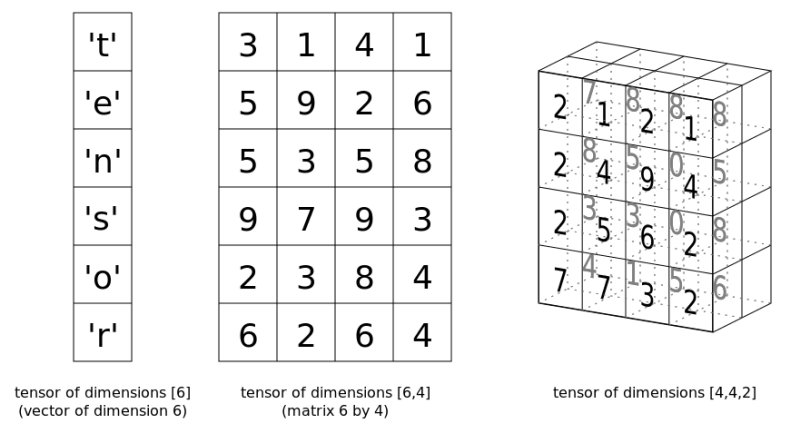

**What is a pytorch tensor?** : A torch.Tensor is a multi-dimensional matrix containing elements of a single data type.

Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

**How to define a pytorch tensor?**
- using existing constructors : _torch.ones_ , _torch.zeros_ _torch.rand_
- based on existing object
    - from another tensor (or only using the shape of the other tensor)
    - from a python list
    - from a numpy array

In [59]:
# define
ones = torch.ones(3,2)
# a tensor can be printed
print(ones)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [60]:
# other basic definition
print(torch.zeros(5,3), "\n",
      torch.rand(2,3), "\n",
      torch.empty(2,2))

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]) 
 tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
 tensor([[-8.1932e-26,  3.3230e-41],
        [-3.3533e-26,  3.3230e-41]])


In [61]:
# from a python list
ls = [[[1,3,5,6],[-1,4,4,4]],[[-1,-3,-5,-6],[10,-4,-4,-4]]]
tensor = torch.Tensor(ls)
print(tensor)
# from a numpy array :
array = np.array([0,1])
#array
tensor = torch.from_numpy(array)
print(tensor)
# symetrically  tensor.numpy()

tensor([[[ 1.,  3.,  5.,  6.],
         [-1.,  4.,  4.,  4.]],

        [[-1., -3., -5., -6.],
         [10., -4., -4., -4.]]])
tensor([0, 1])


If the list is not a proper matrix shape, an exception is returned!

In [62]:
# list must be in a proper matrix shape
ls = [[[1,3,5,6],[-1,4,4,4]],[[-1,-3,-5,-6],[10,-4,-4]]]
torch.Tensor(ls)

ValueError: expected sequence of length 4 at dim 2 (got 3)

**Basic manipulations**
- access type / change data types
- access elements
- reshape
- maths opertions : add, multiply , ..
- differentiate / derive
- set to a specific _device_ : GPU , GPU:0, GPU:1 , CPU ...

In [63]:
# get type
print(tensor,tensor.dtype)
# change type
tensor = tensor.float()

tensor([0, 1]) torch.int64


**NB**: types are important in Deep Learning  because:
- some types are more memory consumming than others : e.g : float16 vs float32
- some operations require a specific type (cf. Embedding layer ...)

In [64]:
tensor = torch.rand(5,2,2)
print(tensor)
# access one element
print(tensor[0,1,1])
# access several element
print(tensor[:3,0,:2])

tensor([[[0.3971, 0.7544],
         [0.5695, 0.4388]],

        [[0.6387, 0.5247],
         [0.6826, 0.3051]],

        [[0.4635, 0.4550],
         [0.5725, 0.4980]],

        [[0.9371, 0.6556],
         [0.3138, 0.1980]],

        [[0.4162, 0.2843],
         [0.3398, 0.5239]]])
tensor(0.4388)
tensor([[0.3971, 0.7544],
        [0.6387, 0.5247],
        [0.4635, 0.4550]])


**NB**: pytorch tensor indexing exactly match numpy indexing

In [65]:
# get the shape of a tensor
tensor.size()
# reshape it
print(tensor, "\n",
      tensor.view(2,2,5))

tensor([[[0.3971, 0.7544],
         [0.5695, 0.4388]],

        [[0.6387, 0.5247],
         [0.6826, 0.3051]],

        [[0.4635, 0.4550],
         [0.5725, 0.4980]],

        [[0.9371, 0.6556],
         [0.3138, 0.1980]],

        [[0.4162, 0.2843],
         [0.3398, 0.5239]]]) 
 tensor([[[0.3971, 0.7544, 0.5695, 0.4388, 0.6387],
         [0.5247, 0.6826, 0.3051, 0.4635, 0.4550]],

        [[0.5725, 0.4980, 0.9371, 0.6556, 0.3138],
         [0.1980, 0.4162, 0.2843, 0.3398, 0.5239]]])


In [66]:
intTensor = torch.ones(3,2, dtype=torch.float32)
print(intTensor, intTensor.dtype)
intTensor.int()

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]]) torch.float32


tensor([[1, 1],
        [1, 1],
        [1, 1]], dtype=torch.int32)

#### Operations on Tensors

❗**Beware of Broadcasting** ❗ issues if your tensors do not have the same size. As in [Numpy broadcasting](https://numpy.org/devdocs/user/basics.broadcasting.html#general-broadcasting-rules), some operations above can broadcast, i.e. extend, their application to the size of the targeted tensor.

One really good explanation about PyTorch specific broadcasting can be found here: https://stackoverflow.com/questions/51371070/how-does-pytorch-broadcasting-work

Let's take the same example and reproduce it here.



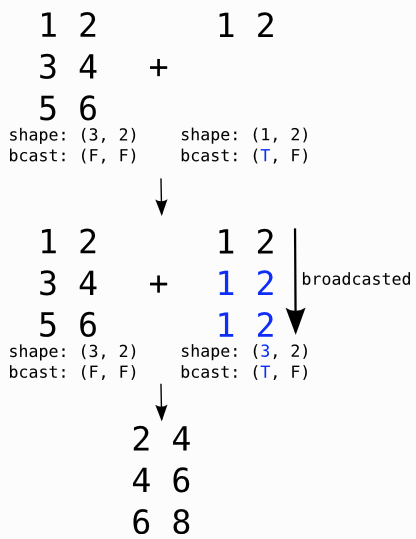

In PyTorch we reproduce it as follows:

In [67]:
tensor_a = torch.Tensor([[1,2], [3,4], [5,6]])
tensor_b = torch.Tensor([1,2])
tensor_a + tensor_b

tensor([[2., 4.],
        [4., 6.],
        [6., 8.]])

#### Automatic Differentiation

The core component of any modern deep learning library is _Automatic Differentiation_.

**Recall**
- Training any deep learning model requires backpropagation
- Backpropagation is an algorithm that efficiently computes the gradient of a neural network's output based on its input and with regard to all its parameters (or also named weights)

_Automatic Differentiation_ provides a way of automatically computing gradients of any function.

### (3.1) Creating a Pytorch **Dataset**

The best way to prepare our dataset to be used in a pytorch model is by using the `torch.utils.data.Dataset` class. We will create a class inheriting from Dataset which should have the `__len__` and `__getitem__` methods. You can find a complete description and example [here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files).

We will also use the [**DataLoader**](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#preparing-your-data-for-training-with-dataloaders), which takes care of batches, shuffling the data...

In [68]:
# Trying to fix "Python was compiled without numpy support"...
#!pip install numpy==1.15.0
!pip install torch==0.4.1.post2


ERROR: Could not find a version that satisfies the requirement torch==0.4.1.post2 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1)
ERROR: No matching distribution found for torch==0.4.1.post2


In [69]:
#import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import Dataset, DataLoader
from torch.nn import CosineSimilarity, MSELoss
import torch.optim as optim
torch.manual_seed(1)

In [70]:
class STSDataset(Dataset):
    def __init__(self, data, max_length=30, vocab=None, min_word_freq=2,lowercase=True):
        '''Params:
        data: dict with 'data' and 'scores' (as in dataset['train'] from load_data())
        vocab: (word2idx, idx2word). A tuple with two dicts: word -> index and index -> word.
        If it is None, the vocabulary is created within the function.
        For the dev and test sets, the training vocabulary should be used.
        max_length: maximum sequence length (in words) allowed. Longer sentences will be truncated. Shorter ones
        will be padded.
        min_freq: int. Used only if vocab=None, to create the vocabulary.
        lowercase: bool. If True, words are lowercased.'''

        # Get the data
        self.data = data['data']
        # Set the maximum length we will keep for the sequences
        self.max_length = max_length
        # Allow to import a vocabulary (for valid/test datasets, that will use the training vocabulary)
        if vocab is not None:
            self.word2idx, self.idx2word = vocab
        else:
            # If no vocabulary imported, build it (and reverse)
            self.word2idx, self.idx2word = self.build_vocab(self.data, min_word_freq, lowercase=lowercase)

        s1s = []
        s2s = []
        for s1, s2 in self.data:
            s1_idcs = []
            s2_idcs = []
            # Tokenize each sentence and turn it into a list of vocabulary indices (remember UNK). Lowercase if necessary
            # Truncate sequences that are longer than <max_length>. Append them to s1s and s2s.
            if lowercase:
              s1 = s1.lower()
              s2 = s2.lower()
            for w in word_tokenize(s1)[:self.max_length]:
                s1_idcs.append(self.word2idx.get(w.lower(), len(self.word2idx)))
            for w in word_tokenize(s2)[:self.max_length]:
                s2_idcs.append(self.word2idx.get(w.lower(), len(self.word2idx)))
            s1s.append(s1_idcs)
            s2s.append(s2_idcs)
        # Apply padding: for sequences shorter than <max_length>, we fill them with 0 values
        # This way they all have the same length (max_length) and we can create a pytorch tensor with them
        self.tensor_s1 = torch.LongTensor(pad_sequences(s1s)) # padding 'pre' by default
        self.tensor_s2 = torch.LongTensor(pad_sequences(s2s))

        # Make a tensor with the targets - we map them to the [-1, 1] interval for convenience (same range as the cosine)
        self.tensor_y = (((torch.FloatTensor(data['scores']) + 1) / 6) * (1+1)) -1

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # The iterator just gets one particular example with its category
        # The dataloader will take care of the shuffling and batching
        if torch.is_tensor(idx):
            idx = idx.tolist()
        return self.tensor_s1[idx], self.tensor_s2[idx], self.tensor_y[idx]

    def build_vocab(self, corpus, count_threshold, lowercase):
        word_count = {}
        for s1, s2 in corpus:
            if lowercase:
              s1 = s1.lower()
              s2 = s2.lower()
            s1_tokens = word_tokenize(s1)
            s2_tokens = word_tokenize(s2)
            for token in s1_tokens + s2_tokens:
                if token not in word_count:
                    word_count[token] = 1
                else:
                    word_count[token] += 1
        filtered_word_counts = {word: count for word, count in word_count.items() if count >= count_threshold}
        words = sorted(filtered_word_counts.keys(), key=word_count.get, reverse=True) + ['UNK']
        # But we need to shift the indexes by 1 to put the padding symbol to 0
        word_index = {words[i]: i + 1 for i in range(len(words))}
        idx_word = {i + 1: words[i] for i in range(len(words))}
        return word_index, idx_word

    def get_vocab(self):
        # A simple way to get the training vocab when building the valid/test
        return self.word2idx, self.idx2word

In [71]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [72]:
training_dataset = STSDataset(dataset['train'])
training_word2idx, training_idx2word = training_dataset.get_vocab()

In [73]:
training_word2idx

{'.': 1,
 'a': 2,
 'the': 3,
 'in': 4,
 ',': 5,
 'is': 6,
 'to': 7,
 'of': 8,
 'and': 9,
 'on': 10,
 'man': 11,
 "'s": 12,
 'with': 13,
 'for': 14,
 'at': 15,
 'woman': 16,
 'are': 17,
 'that': 18,
 'two': 19,
 'said': 20,
 'dog': 21,
 'was': 22,
 'from': 23,
 'an': 24,
 'playing': 25,
 '``': 26,
 'it': 27,
 "''": 28,
 'by': 29,
 ':': 30,
 'as': 31,
 'white': 32,
 'black': 33,
 '$': 34,
 'killed': 35,
 'us': 36,
 'after': 37,
 'percent': 38,
 'up': 39,
 'not': 40,
 'has': 41,
 'have': 42,
 'be': 43,
 "'": 44,
 'new': 45,
 'i': 46,
 'syria': 47,
 'people': 48,
 'his': 49,
 'china': 50,
 'he': 51,
 'or': 52,
 'into': 53,
 '?': 54,
 'over': 55,
 'you': 56,
 'its': 57,
 'were': 58,
 'down': 59,
 'running': 60,
 'president': 61,
 'police': 62,
 'water': 63,
 'person': 64,
 'red': 65,
 'girl': 66,
 'riding': 67,
 'boy': 68,
 'nuclear': 69,
 'but': 70,
 'will': 71,
 'u.s.': 72,
 'against': 73,
 'standing': 74,
 'sitting': 75,
 'brown': 76,
 "n't": 77,
 'had': 78,
 'iran': 79,
 'more': 80,
 't

In [74]:
# create dev_dataset and test_dataset as above using the training vocabulary
test_dataset = STSDataset(dataset['test'], vocab=(training_word2idx, training_idx2word))
dev_dataset = STSDataset(dataset['dev'], vocab=(training_word2idx, training_idx2word))

# Prepare the DataLoaders:
training_dataloader = DataLoader(training_dataset, batch_size = 40, shuffle=True)
dev_dataloader = DataLoader(dev_dataset, batch_size = 25)
test_dataloader = DataLoader(test_dataset, batch_size = 25)

print(f"Number of validation examples: {len(dev_dataloader)}")

Number of validation examples: 60


### (3.2) Implementing the model

Below is the implementation of our model, inspired from [this post](https://towardsdatascience.com/a-friendly-introduction-to-siamese-networks-85ab17522942).
It consists of an embedding layer and a biLSTM. After two sentences have been passed through the model, we calculate their cosine similarity, which is the output value.
You can experiment with changing the dimension of embeddings (`embedding_dim`), the biLSTM layers dimension (`hidden_dim`), the number of biLSTM layers `num_lstm_layers`.

You don't have to, but if you want to try more advanced modifications, you can replace the biLSTM by a unidirectional LSTM (setting `bidirectional` to `False` and modifying `CosineSimilarity` and `forward_once`).
By default all weights are randomly initialized, but you can also try to use (and fine-tune) pre-trained word embeddings.

In [75]:
# Implementing the model

class SiameseBILSTM(nn.Module):
    def __init__(self, embedding_dim, vocabulary_size, hidden_dim, num_lstm_layers=1, embeddings=None, fine_tuning=False):
        super(SiameseBILSTM, self).__init__()
        if embeddings is None:
            self.embeddings = nn.Embedding(vocabulary_size + 1, embedding_dim, padding_idx=0)
        else:
            self.embeddings = nn.Embedding.from_pretrained(embeddings)
            self.embeddings.requires_grad_(fine_tuning)
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_lstm_layers, batch_first=True, bidirectional=True)
        self.cos = CosineSimilarity(dim=1)

    def forward_once(self, x):
        # Forward pass of one input
        output = self.embeddings(x)
        h, (h_n, h_c) = self.rnn(output)
        out_both = h[:, -1, :]
        return out_both

    def forward(self, input1, input2):
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        sim = self.cos(output1, output2)

        return sim


In [76]:
# Initialize the model with the desired parameters

# After testing on several configurations, we choose this configuration (see test of configurations at 3.4/3.5)
embedding_dim = 100
hidden_dim = 150
num_lstm_layers = 1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SiameseBILSTM(embedding_dim, len(training_word2idx), hidden_dim=hidden_dim, num_lstm_layers=num_lstm_layers)

model.to(device)

# Create an optimizer
opt = optim.Adam(model.parameters(), lr=0.0025, betas=(0.9, 0.999))
# The criterion is MSE since we have a regression problem
criterion = MSELoss()

### (3.3) Building the training loop

In [77]:
# Training function which trains the model for one epoch

def train_epoch(model, opt, criterion, dataloader):
    model.train()
    losses = []
    preds = []
    all_ys = []
    for i, (x1, x2, y) in enumerate(dataloader):
        opt.zero_grad()
        # (1) Forward
        out = model(x1.to(device), x2.to(device))
        # (2) Compute the loss
        loss = criterion(out, y.to(device))
        # (3) Compute gradients
        loss.backward()
        # (4) update weights
        opt.step()
        preds.extend(out.cpu().detach().numpy())
        all_ys.extend(y.cpu().detach().numpy())
        losses.append(loss)

        #if (i%20 == 0):
        #    print("Batch " + str(i) + " : training loss = " + str(loss.item()) + "; training r = " + str(evaluate(out.cpu().detach().numpy(), y.cpu().detach().numpy())))
    print(losses)
    print("Total epoch loss = " + str(sum(losses)/(i+1)) + "; Total training r = " + str(evaluate(preds, all_ys)))
    return losses

In [78]:
# Evaluation function (relying on the evaluation function created at the beginning of the notebook)

def eval_model(model, criterion, evalloader):
    all_ys = []
    total_epoch_loss = 0
    preds = []
    model.eval()

    # OUR CODE :
    all_losses = []

    with torch.no_grad():
        for i, (x1, x2, y) in enumerate(evalloader):
            out = model(x1.to(device), x2.to(device))
            loss = criterion(out, y.to(device))
            total_epoch_loss += loss.item()
            preds.extend(out.cpu().detach().numpy())
            all_ys.extend(y.cpu().detach().numpy())

            # OUR CODE :Collect the loss for each prediction
            all_losses.extend([(loss.item(), i)]) # i = index of pair sentence in evalloader

    # OUR CODE :
    all_losses_sorted = sorted(all_losses, key = lambda x: x[0], reverse=True)
    ################# PEARSON
    return total_epoch_loss/(i+1), evaluate(preds, all_ys), all_losses_sorted

In [79]:
"# A function which will help you execute experiments rapidly - with an early_stopping option when necessary."
def experiment(model, opt, criterion, num_epochs = 5, early_stopping = True, evaluate_on_test='False'):
  '''
  model: the SiameseBILSTM model
  opt: the optimizer
  criterion: the loss function
  if early stopping is set to True, training will stop if the validation loss starts going up. This prevents overfitting
  evaluate_on_test: bool. If True, the function performs a final evaluation on the test set'''
  train_losses = []
  all_losses = []
  # OUR CODE
  dev_losses = []  # To store dev losses
  test_losses = []  # To store test losses

  if early_stopping:
      best_dev_loss = 10.
  print("Beginning training...")

  for e in range(num_epochs):
      print("Epoch " + str(e+1) + ":")
      train_losses += train_epoch(model, opt, criterion, training_dataloader)

      # OUR CODE :
      dev_loss, dev_r, losses_epoch_sorted = eval_model(model, criterion, dev_dataloader)
      all_losses.extend(losses_epoch_sorted)
      dev_losses.append(dev_loss)

      print("Epoch " + str(e+1) + " : Validation loss = " + str(dev_loss) + "; Validation r = " + str(dev_r))
      if early_stopping:
          if dev_loss < best_dev_loss:
              best_dev_loss = dev_loss
          else:
              print("Early stopping.") # if validation loss started going up... stop to prevent overfitting
              break
  if evaluate_on_test:
    test_loss, test_r, losses_tech_sorted = eval_model(model, criterion, test_dataloader)
    # OUR CODE
    test_losses.append(test_loss)
    print("Epoch " + str(e+1) + " : Test loss = " + str(test_loss) + "; Test r = " + str(test_r))


  #### OUR CODE :
  # Calculate average losses for dev and test
  avg_dev_loss = sum(dev_losses) / len(dev_losses) if dev_losses else 0
  avg_test_loss = sum(test_losses) / len(test_losses) if test_losses else 0
  print(f"Average dev loss for this configuration: {avg_dev_loss}")
  if evaluate_on_test:
        print(f"Average test loss for this configuration: {avg_test_loss}")


  return {
        "train_losses": train_losses,
        "dev_loss": avg_dev_loss
    }



In [80]:
print(model.state_dict()['rnn.weight_ih_l0'].shape)
print(model.state_dict()['rnn.weight_hh_l0'].shape)
print(model.state_dict()['rnn.weight_hh_l0_reverse'].shape)

torch.Size([600, 100])
torch.Size([600, 150])
torch.Size([600, 150])


### (3.4-3.5) Train and evaluate

In [81]:
"# A function which will help you execute experiments rapidly - with an early_stopping option when necessary."
def experiment(model, opt, criterion, num_epochs = 5, early_stopping = True, evaluate_on_test='False'):
  '''
  model: the SiameseBILSTM model
  opt: the optimizer
  criterion: the loss function
  if early stopping is set to True, training will stop if the validation loss starts going up. This prevents overfitting
  evaluate_on_test: bool. If True, the function performs a final evaluation on the test set'''
  train_losses = []
  all_losses = []
  # OUR CODE
  dev_losses = []  # To store dev losses
  test_losses = []  # To store test losses

  if early_stopping:
      best_dev_loss = 10.
  print("Beginning training...")

  for e in range(num_epochs):
      print("Epoch " + str(e+1) + ":")
      train_losses += train_epoch(model, opt, criterion, training_dataloader)

      # OUR CODE :
      dev_loss, dev_r, losses_epoch_sorted = eval_model(model, criterion, dev_dataloader)
      all_losses.extend(losses_epoch_sorted)
      dev_losses.append(dev_loss)

      print("Epoch " + str(e+1) + " : Validation loss = " + str(dev_loss) + "; Validation r = " + str(dev_r))
      if early_stopping:
          if dev_loss < best_dev_loss:
              best_dev_loss = dev_loss
          else:
              print("Early stopping.") # if validation loss started going up... stop to prevent overfitting
              break
  if evaluate_on_test:
    test_loss, test_r, losses_tech_sorted = eval_model(model, criterion, test_dataloader)
    # OUR CODE
    test_losses.append(test_loss)
    print("Epoch " + str(e+1) + " : Test loss = " + str(test_loss) + "; Test r = " + str(test_r))


  #### OUR CODE :
  # Calculate average losses for dev and test
  avg_dev_loss = sum(dev_losses) / len(dev_losses) if dev_losses else 0
  avg_test_loss = sum(test_losses) / len(test_losses) if test_losses else 0
  print(f"Average dev loss for this configuration: {avg_dev_loss}")
  if evaluate_on_test:
        print(f"Average test loss for this configuration: {avg_test_loss}")


  return {
        "train_losses": train_losses,
        "dev_loss": avg_dev_loss
    }



In [83]:


results = []

configs = [
    {"embedding_dim": 70, "hidden_dim": 150, "num_lstm_layers": 1},
    {"embedding_dim": 100, "hidden_dim": 150, "num_lstm_layers": 1},
    {"embedding_dim": 70, "hidden_dim": 200, "num_lstm_layers": 1},
    {"embedding_dim": 70, "hidden_dim": 150, "num_lstm_layers": 3},
    {"embedding_dim": 100, "hidden_dim": 200, "num_lstm_layers": 3}
]

summary_results = dict()
for i, config in enumerate(configs):
    print(f"Config: {config}")

    #Init model
    model = SiameseBILSTM(
        embedding_dim=config["embedding_dim"],
        vocabulary_size=len(training_word2idx),
        hidden_dim=config["hidden_dim"],
        num_lstm_layers=config["num_lstm_layers"]
    ).to(device)

    opt = optim.Adam(model.parameters(), lr=0.0025, betas=(0.9, 0.999))
    criterion = MSELoss()

    #Experiment
    result = experiment(model, opt, criterion)
    result["config"] = config  # Store configuration in the result
    summary_results[i+1] = result['dev_loss']
    results.append(result)

    print("_______________________________________________________________________________")

#Sort results by dev loss
sorted_results = sorted(results, key=lambda x: x["dev_loss"])

# Get the best result =best configuration
best_result = sorted_results[0]
print("Best configuration:")
print(best_result["config"])
print(f"Validation loss: {best_result['dev_loss']}")

# Evaluate the best model (with best config) on the test set
print("Evaluating the best configuration on the test set...")
best_config = best_result["config"]
best_model = SiameseBILSTM(
    embedding_dim=best_config["embedding_dim"],
    vocabulary_size=len(training_word2idx),
    hidden_dim=best_config["hidden_dim"],
    num_lstm_layers=best_config["num_lstm_layers"]
).to(device)

## BEST AND WORST PREDICTIONS
dev_loss, dev_r, all_losses_sorted = eval_model(best_model, criterion, dev_dataloader)

# sort loss in descending order (worst predictions first)
all_losses_sorted_descending = sorted(all_losses_sorted, key=lambda x: x[0], reverse=True)
# sort loss in ascendng order (best predictions first)
all_losses_sorted_ascending = sorted(all_losses_sorted, key=lambda x: x[0])

#Best predictions
best_indices = [x[1] for x in all_losses_sorted_ascending[:5]]
print("SENTENCES WITH BEST PREDICTIONS OF SIMILARITY: ")
for i, (sentence1, sentence2, _) in enumerate(dev_dataset):
    if i in best_indices:
        decoded_sentence1 = " ".join([training_idx2word[token_id.item()] for token_id in sentence1 if token_id.item() != 0])
        decoded_sentence2 = " ".join([training_idx2word[token_id.item()] for token_id in sentence2 if token_id.item() != 0])

        print("Sentence 1:", decoded_sentence1)
        print("Sentence 2:", decoded_sentence2)

print("_________________________________")

#Worst predictions
worst_indices = [x[1] for x in all_losses_sorted_descending[:10]]
print("SENTENCES WITH WORST PREDICTIONS OF SIMILARITY: ")
for i, (sentence1, sentence2, _) in enumerate(dev_dataset):
    if i in worst_indices:
        decoded_sentence1 = " ".join([training_idx2word[token_id.item()] for token_id in sentence1 if token_id.item() != 0])
        decoded_sentence2 = " ".join([training_idx2word[token_id.item()] for token_id in sentence2 if token_id.item() != 0])

        print("Sentence 1:", decoded_sentence1)
        print("Sentence 2:", decoded_sentence2)
        print("----")






print('Summary configuration number and mean dev loss')

summary_results




Config: {'embedding_dim': 70, 'hidden_dim': 150, 'num_lstm_layers': 1}
Beginning training...
Epoch 1:
[tensor(0.3937, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.4864, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.5153, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.1792, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.2679, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.3538, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.2729, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.4120, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.3048, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.3810, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.3204, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.2810, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.3035, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.3963, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.3341, device='cuda:0', grad_fn=<Ms

{1: 0.2385098851472139,
 2: 0.24361670753608147,
 3: 0.23059807680547237,
 4: 0.257487929786245,
 5: 0.23409047512958447}

### 3.6 Analyze the output

1. Look at the outputs of the best model (i.e., the predictions that it makes for sentence pairs).
2. Identify the cases where the predictions is far away from the ground truth (e.g., high similarity pairs that were attributed low similarity, or viceversa).*
3. Inspect them manually and make a qualitative analysis: do you identify any patterns or typically difficult cases? Any weaknesses or strong points of this model? Does this give you any idea about how this model (or your other models could be improved?

* the "worst predictions" would be those which are farthest away from their corresponding gold value. You can determine this with the Mean Squared Error (MSE), for example.


### A bit of reflection

In the report, you can write:
- What configurations did you try and which one worked best?
- All the thoughts and examples relating to the analysis in 3.6.


## A bit of reflection (globally)

- Out of the two types of models you implemented, which one was the best?
- How do you think the models could be combined for better performance?


## Team-specific exercise

There are three different team-specific exercises. You only have to do the one that has been assigned to you.

- A: Spanish STS
- B: Informal STS
- C: Biomedical STS

No matter what team you are in, remember to always look at the data, compare the different models you test, and think of reasons for the observed outcome.

### Team A: Spanish STS

A lot of NLP work focuses on English, but all languages need resources and models. In this exercise you will address STS in Spanish. Note that you don't need to speak or understand Spanish to complete this task.

For this exercise you will:
- Download a specific dataset, as well as Spanish word embeddings. Note that some special preprocessing will be needed.
- **Exercise A.1**: implement a model like the one in (2) for this task.
- **Exercise A.2**: combine the word embeddings (or similarities derived from them) with at least one feature of those used in model (1) (yes, it could be simple word overlap, but you are encouraged to try something more specific to Spanish - you have some ideas below).
- **Exercise A.3**: automatically translate the dataset to English and apply one of your English models.

Remember to compare results of all models and write your observations in the report.


#### (Team A) Dataset

- For training: the [**2015** data](http://ixa2.si.ehu.es/stswiki/images/9/9d/STS2015-es-test.zip) (751 instances)
- For testing: the [**2017 track 3** data](http://ixa2.si.ehu.es/stswiki/images/2/20/Sts2017.eval.v1.1.zip) with its [gold standard](http://ixa2.si.ehu.es/stswiki/images/7/70/Sts2017.gs.zip) (250 instances)


Download the datasets, upload them to Colab, get acquainted with them, and load them using the code below.

In [ ]:
# Loading team A datasets
! unzip STS2015-es-test.zip -d STS2015-es-test
! unzip Sts2017.eval.v1.1.zip
! unzip Sts2017.gs.zip


In [ ]:
def load_mono_spanish_data():
  traindir = "STS2015-es-test/"
  data = dict()
  for subset in ["train","test"]:
    data[subset] = dict()
    data[subset]["data"] = []
    data[subset]["scores"] = []
  train_data_by_category = dict()
  train_scores_by_category = dict()
  for fn in os.listdir(traindir):
    _, typ, category, _ = fn.split(".")
    with open(traindir + fn) as f:
      if typ == "gs":
        train_scores_by_category[category] = []
        for l in f:
          train_scores_by_category[category].append(float(l))
      elif typ == "input":
        train_data_by_category[category] = []
        for l in f:
          train_data_by_category[category].append(l.strip().split("\t"))

  for cat in train_data_by_category:
    data['train']['data'].extend(train_data_by_category[cat])
    data['train']['scores'].extend(train_scores_by_category[cat])

  #### now test data and then we merge them...
  with open("STS2017.eval.v1.1/STS.input.track3.es-es.txt") as f:
    for l in f:
      data['test']['data'].append(l.strip().split("\t"))
  with open("STS2017.gs/STS.gs.track3.es-es.txt") as f:
    for l in f:
      data['test']['scores'].append(float(l))

  return data



In [ ]:
# Load the data

mono_data = load_mono_spanish_data()

print("Score ranges:")
print(min(mono_data['train']['scores']), "-", max(mono_data['train']['scores']))
print(min(mono_data['test']['scores']), "-", max(mono_data['test']['scores']))

## Careful! The range of scores is different in the Spanish training set. It goes from 0 to 4.
# We will map it to a 0-5 scale

mono_data['train']['scores'] = (np.array(mono_data['train']['scores']) / 4) * 5

## Also, you may notice that some sentence pairs are repeated within the training set, but have different scores.
## We will simply make sure that there is no overlap between the training and the test datasets:


found = False
tr_sps = [tuple(ins) for ins in mono_data['train']['data']]
te_sps = [tuple(ins) for ins in mono_data['test']['data']]
for ins in te_sps:
  if ins in tr_sps:
    found = True
    break
if found:
  print("Found some repetition")
else:
  print("No repetitions found")


#### (Team A) Word embeddings in other languages

In this experiment, you will implement a model using word embeddings, similar to what you did in (2). This time you will combine word-embedding-based features with some other feature from the model in (1).

For STS in Spanish, we will download Spanish Fasttext word embeddings from [this website](https://fasttext.cc/docs/en/crawl-vectors.html). The link to the Spanish embeddings is [here](https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.es.300.bin.gz).
You can either download them from the link or using the code below.

For convenience, for these word embeddings we will use a different library: `fasttext`. The code below shows how to retrieve the embedding for a word.


In [ ]:
# This will take a while

! pip install fasttext
import fasttext.util
print("Installed and loaded the library")
# Download Spanish embeddings using this code or from the link above
fasttext.util.download_model('es', if_exists='ignore')
print("Downloaded embeddings")
# Load them
ft = fasttext.load_model('cc.es.300.bin')
print("Loaded embeddings")

# This is how you get the embedding of a word
vector = ft.get_word_vector('hola')

#### (Team A) Preprocessing: Spanish specifics

Be careful: not all the features that you used in the first model may readily work for Spanish (for example, WordNet is English). Ideally, you should use a tokenizer that is specific for Spanish. You can find some sample code below.

Just as French, Spanish is a language with much more inflection than English. This means that one word can have many different forms. Take as an example the [conjugation of the verb _cantar_ ("to sing")](https://www.conjugacion.es/del/verbo/cantar.php)
(Perhaps lemmatizing would be a good idea? Check out [spacy](https://spacy.io/models/es) for that if you need to)

In [ ]:
! pip install spacy
# Downloading Spanish model
! python -m spacy download es_core_news_sm
# TODO check this cell again
import spacy
import es_core_news_sm
nlp = es_core_news_sm.load()
#nlp = spacy.load('es_core_news_sm')
text = "Esto es una frase en español." # "This is a sentence in Spanish."
processed_text = nlp(text)
for t in processed_text:
  print(t)

In [ ]:
# Exercise A.1
## TO COMPLETE

In [ ]:
# Exercise A.2
## TO COMPLETE

In [ ]:
# Exercise A.3
## TO COMPLETE

---------------------------------------------------------------------------------------------------------------------


### Team B: Informal STS

A lot of NLP models are trained on newswire or Wikipedia text, but these do not reflect the informal language style that we find on social media like Twitter. We need models that understand slang, that are robust to misspellings and to the creative use of language. In this exercise you will tackle an STS task on Twitter data.

For this exercise you will:
- Download a specific dataset, as well another set of word embeddings trained on Urban Dictionary.
- **Exercise B.1**: implement a model like the one in (2) but relying on Urban Dictionary embeddings
- **Exercise B.2**: evaluate _at least_ one of your previous models relying on word2vec embeddings on this dataset. Compare its results to those of the model in B.1. Remember to write your observations in the report.
- **Exercise B.3**: have a close look at the data, identify potential difficulties specific to this kind of language, and discuss potential solutions in the report.

#### (Team B) Dataset

You can find the dataset [here](https://drive.google.com/file/d/0B1P1xW5xNISsTG1PV3VVMzg5cXc/view?usp=sharing)


You can read more about it in the paper of the corresponding SemEval task, [SemEval 2015 Task 1: Paraphrase and Semantic Similarity in Twitter (PIT)](https://aclanthology.org/S15-2001.pdfSemEval-2015)

Download the dataset, upload it to Colab, get acquainted with it, and load it using the code below.
Note that, although it is a dataset of tweets, mentions (@) and hashtags (#) have been excluded.
Tweets are tokenized, pos-tagged and have named entity tags. Feel free to take advantage of this.

In [ ]:
! unzip SemEval-PIT2015-github.zip

In [ ]:
from ast import literal_eval

def load_twitter_data():
  traindir = "SemEval-PIT2015-github/data/"
  data = dict()
  for subset in ["train","dev","test"]:
    data[subset] = dict()
    data[subset]["data"] = []
    data[subset]["scores"] = []
    with open(traindir + "/" + subset + ".data") as f:
      for l in f:
        l = l.strip().split("\t")
        #if subset in ["train"]
        #topic_id, topic, sent1, sent2, (label), sent1tag, sent2tag = l.split("\t")
        data[subset]['data'].append((l[2], l[3]))
        if subset in ["train","dev"]:
          # every sentence has two labels: (X, Y). X is the number of annotators that voted positively (= both sentences have the same meaning)
          # and Y is the number of annotators who voted negatively.
          # We will use X as the reference similarity score. We map it to the (0, 1) range
          label = literal_eval(l[4])[0]
          data[subset]['scores'].append(label / 5)
  with open(traindir + "/test.label") as f:
    # Scores are expressed differently in the test set (they go from 0 to 1).
      for l in f:
        l = l.strip().split("\t")
        label = float(l[1])
        data["test"]['scores'].append(label)
  return data

twitter_data = load_twitter_data()


#### (Team B) Urban Dictionary embeddings

You can download the Urban Dictionary embeddings [from this link](http://smash.inf.ed.ac.uk/ud-embeddings/). More information on how they were trained is found in [this paper](https://aclanthology.org/2020.lrec-1.586.pdf).

Below is some code to load them:

In [ ]:
! pip install fasttext

ft = fasttext.load_model('ud_basic.bin')
print("Loaded embeddings")

# This is how you get the embedding of a word
vector = ft.get_word_vector('ttyl')

In [ ]:
# Exercise B.1
## TO COMPLETE

In [ ]:
# Exercise B.2
## TO COMPLETE

In [ ]:
# Exercise B.3
## TO COMPLETE (in the report, mostly)

### Team C: Biomedical STS

A lot of NLP models are trained on general or mixed-domain corpora, and do not always work very well when applied directly on text with specialized vocabulary. For example, legal or biomedical language is hard to understand for non-experts, even if they are native speakers. These domains could benefit from STS, as it could facilitate the search of similar legal cases or diagnostics.

For this exercise you will:
- Download a specific dataset, as well another set of word embeddings trained on biomedical data.
- **Exercise C.1**: compare word2vec embeddings to the biomedical embeddings and write about it in the report (more details and examples below).
- **Exercise C.2**: implement a model like the one in (2) but relying on biomedical embeddings.
- **Exercise C.3**: Evaluate on this task one of your models relying on w2v embeddings. Compare it to the results obtained in C.2. Remember to write your observations in the report.


#### (Team C) Dataset

You can download a ready-to-use version of the BIOSSES dataset from [this link](https://drive.google.com/file/d/1xR8m93BucP6Wjt194npmGmCN_CdEL8rD/view?usp=share_link). The original dataset can be found on [this website](https://tabilab.cmpe.boun.edu.tr/BIOSSES/DataSet.html).
Note that it is a very small dataset (only 100 sentence pairs!). For this reason, we will not be doing any training - we will use embedding similarities directly for prediction.

You can read more about this dataset in [this paper](https://watermark.silverchair.com/btx238.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAvEwggLtBgkqhkiG9w0BBwagggLeMIIC2gIBADCCAtMGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQM_c8fJi2ZMK3g-u9WAgEQgIICpNLih7-3oD05jPtpL11-qGClPcamdz7eEVP9sATpAHrUPKMTX2N5hybs8JYjU1M34cYSkp_si8vcJZVXDcgMg5KtvIH5nmpl2RJom4jpffznpxBNHkTnXFcpQbK0b9PK3uO5TtimoJgBbnt07YxC9nusQWhXn8A1x8iaNaa3prRBszQ2G6wBR--vLyVDL62EFDYX_fVwqZ8o2V_asecviJUVBwsZ8AzSHTpQdc0Hy1qbq17YgrATgyf4NfgET5YeWF4vHcYaxTf-a-Z9c9HYYYv2WUOhciwWzyrebHbI2Zu_36MiB_DIA_4cbgPsu-HghYEF9NgZNdoyya8-mbu7BswqzYbPymntFpKHLpcl88EM_zHyQmUr8mfd0VbBsgXIUjlCGJ0nK6sHdundhRlhp0xUpsHxP6oUOYPIDiK3p8i7Zg8yavr76YpxQMCC6HEDwJA8S8sKhs4g76jVW8_X-sO06aju3j-M0eeBRL9g7j0H-cxEed2E8HrzFfJhirmj4_oxpnqmHPaMnQT1zKk_9J4ZVHHL55RbmEDlWAGsMIE6sc6GmBtY5RjbAz-G0JXoPD478kLP3o6EBfXPhsIlnwUQBdhoNSnfiuOLc9DQ3ssu3iZw6er59R7hqZzF-EqGp53b2eA3pvr8oEnoSGaAKF3h6IvyUgjOXeqFpCk0tUzpgxQTCct23bEALplEXGFKR_iplRerD8mNESX_zpsPoYa1AVxyv21Zz5_K5ya_B_k0UpxwWIIL-dj5SbJJUzOjgD10U0i0Q3AW906K8uVVzyjCcdhTWqajz1_70_d03BgxSXhfSxD6n-hpGXEp-cWsPZ836Bc-FmV5cK2zWAkOvc2mxv8RQgiwm5b0JjwI5rC88j-whhSh7NsEQ6L-YGXelQw978c).

Download the dataset, upload it to Colab, get acquainted with it, and load it using the code below.


In [ ]:
import numpy as np

In [ ]:
!unzip BIOSSES_dataset.zip

In [ ]:
def load_biosses_dataset():
  data = dict()
  data['data'] = []
  data['scores'] = []
  with open("Annotation-Pairs.csv") as f:
    for i, l in enumerate(f):
      if i == 0:
        continue
      l = l.strip().split("\t")
      data['data'].append((l[1].strip('"'),l[2].strip('"')))
  # Each sentence pair was annotated by five different annotators. As in the original paper, we use the mean as the reference similarity
  with open("Annotator-Scores.csv") as f:
    for i, l in enumerate(f):
      if i == 0:
        continue
      l = l.strip().split("\t")
      scores = list(map(float, l[1:]))
      data['scores'].append(np.average(scores) / 4) # scores range from 0 to 4. We map them to the (0,1) range
  return data


biosses = load_biosses_dataset()

#### (Team C) Biomedical embeddings

You can download the biomedical embeddings [here](https://figshare.com/articles/dataset/) (download the "bio_embeddings_intrinsic file)
You can find more details on how they were trained on [this paper](https://www.nature.com/articles/s41597-019-0055-0)

Below is some code to load them:

In [ ]:
# (if the code below gives you some errors, try this version of gensim):
#! pip install gensim==4.1.2

#### (Team C) Comparing embeddings

As part of Exercise C.1, load biomedical and w2v embeddings and make an exploratory analysis looking at questions like the following:
- What are the vocabulary sizes of each model? Look at (and give examples of) words that are present in the biomedical embeddings but not in w2v, and viceversa.
- How much vocabulary of the BIOSSES dataset does each embedding model cover?
- Pick a few word pairs that you expect to be more similar/dissimilar than other word pairs and see what cosine similarities you obtain with each embedding type. Try to include some biomedical words that you know of. What do you observe?
(Example/hint: can you explain what happens with the words *chair*, *table* and *stool*?)

In [ ]:
import scipy.linalg.special_matrices
from gensim.corpora.dictionary import Dictionary
import pyemd
from pyemd import emd
from gensim.models import KeyedVectors
import copy
from nltk.stem import PorterStemmer as ps
from nltk.tokenize import word_tokenize
import nltk
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
nltk.download('stopwords')
import re
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from scipy.spatial.distance import cosine, euclidean
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('averaged_perceptron_tagger_eng')

In [ ]:
from gensim.models import KeyedVectors
model_path_bio = "/content/drive/MyDrive/bio_embedding_intrinsic"  # Remplacer par le chemin du modèle
bio_vectors = KeyedVectors.load_word2vec_format(model_path_bio, binary=True)

# to retrieve the vector for a word:
homeostasis_vec = bio_vectors['homeostasis']

model_path = "/content/drive/MyDrive/GoogleNews-vectors-negative300.bin"  # Remplacer par le chemin du modèle
vector_word2vec = KeyedVectors.load_word2vec_format(model_path, binary=True)

### Let's get some insights

In [ ]:
print(len(biosses['data']))
print(len(bio_vectors))
print(len(vector_word2vec))

In [ ]:
# Exercise C.1

### Preprocess all data with lemmatization
def map_universal_tag_to_wordnet(universal_tag):
    if universal_tag == 'NOUN':
        return wordnet.NOUN
    elif universal_tag == 'VERB':
        return wordnet.VERB
    elif universal_tag == 'ADJ':
        return wordnet.ADJ
    elif universal_tag == 'ADV':
        return wordnet.ADV
    else:
        return wordnet.NOUN

def preprocess_dataset_biosses(data )-> dict:
  """ Lower case + remove punctuation + lemmatize(optional)  + tokenize """
  lem = WordNetLemmatizer()
  stop_words = set(stopwords.words('english'))
  dataset_preprocess = dict()
  dataset_preprocess = copy.deepcopy(data)
  preprocess_data = []
  for s1, s2 in dataset_preprocess['data']:

    prep_s1 = re.sub(r'[\.\?\!\,\:\;\#\"]', '', s1)
    prep_s2 =re.sub(r'[\.\?\!\,\:\;\#\"]', '', s2)

    tagged_tokens1 = pos_tag(prep_s1.split() , tagset = 'universal')
    tagged_tokens2 = pos_tag(prep_s2.split(), tagset = 'universal')

    lem_s1 = [lem.lemmatize(token , map_universal_tag_to_wordnet(tag)) for token, tag in tagged_tokens1 if token.lower() not in stop_words]
    lem_s2 = [lem.lemmatize(token , map_universal_tag_to_wordnet(tag)) for token, tag in tagged_tokens2 if token.lower() not in stop_words]

    preprocess_data.append([lem_s1 , lem_s2])

  dataset_preprocess['data'] = preprocess_data
  return dataset_preprocess

biosses_process = preprocess_dataset_biosses(biosses)

In [ ]:
# Exercise C.1
# Vocabulary size :

bio_vocab_size = len(bio_vectors.key_to_index)
w2v_vocab_size = len(vector_word2vec.key_to_index)

print("Biomedical embeddings vocabulary size:", bio_vocab_size)
print("Google News Word2Vec vocabulary size:", w2v_vocab_size)

w2v_vectors_vocab = set(vector_word2vec.key_to_index.keys())
bio_vectors_vocab = set(bio_vectors.key_to_index.keys())

unique_bio_vocab = bio_vectors_vocab - w2v_vectors_vocab
unique_w2v_vocab = w2v_vectors_vocab - bio_vectors_vocab

print("Examples of words unique to bio_vectors:", list(unique_bio_vocab)[:10])
print("Examples of words unique to unique_w2v_vocab vectorized vocab:", list(unique_w2v_vocab)[:10])

''' test = {}
test["data"][0] = ("chair", "table")
test["data"][1] = ("chair", "apple")
test["vector"][0] = [bio_vectors["chair"], bio_vectors["table"]]
test["vector"][1] = [bio_vectors["chair"], bio_vectors["apple"]] '''

word_pairs = [
    ("gene", "genome"),
    ("virus", "infection"),
    ("protein", "molecule"),
    ("disease", "disorder"),
]
sim = []

for word1, word2 in word_pairs:
  similarity = 1 - cosine(bio_vectors[word1], bio_vectors[word2])
  sim.append(similarity)
  print(f"BioVec cosine similarity for '{word1}' and '{word2}is : ", similarity)

  similarity = 1 - cosine(vector_word2vec[word1], vector_word2vec[word2])
  sim.append(similarity)
  print(f"Word2Vec cosine similarity for '{word1}' and '{word2}is : ", similarity, '\n')

print(sim)

# Collect BIOSSES vocabulary
biosses_vocab = set()
for sentence1, sentence2 in biosses_process['data']:
    biosses_vocab.update(sentence1)
    biosses_vocab.update(sentence2)

# Calculate coverage for each model
biosses_bio_coverage = len(biosses_vocab & bio_vectors_vocab) / len(biosses_vocab) * 100
biosses_w2v_coverage = len(biosses_vocab & w2v_vectors_vocab) / len(biosses_vocab) * 100

print(f"BIOSSES vocabulary coverage by biomedical embeddings: {biosses_bio_coverage:.2f}%")
print(f"BIOSSES vocabulary coverage by general Word2Vec embeddings: {biosses_w2v_coverage:.2f}%")

In [ ]:
print(len(biosses_vocab & bio_vectors_vocab))
print(bio_vectors_vocab & w2v_vectors_vocab)

### Model pour Bioset Medical

In [ ]:
# Exercise C.2
from sklearn.model_selection import train_test_split

# Split data and scores simultaneously to maintain correspondence
data_train, data_test, scores_train, scores_test = train_test_split(
    biosses['data'], biosses['scores'], test_size=0.2, random_state=42
)

# Create dictionaries for training and testing sets
train_dict = {'data': data_train, 'scores': scores_train}
test_dict = {'data': data_test, 'scores': scores_test}

print("Training set:", train_dict)
print("Testing set:", test_dict)
dataset_dic={'test':test_dict,'train':train_dict}

In [ ]:
import copy
from nltk.stem import PorterStemmer as ps
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

In [ ]:
def map_universal_tag_to_wordnet(universal_tag):
    if universal_tag == 'NOUN':
        return wordnet.NOUN
    elif universal_tag == 'VERB':
        return wordnet.VERB
    elif universal_tag == 'ADJ':
        return wordnet.ADJ
    elif universal_tag == 'ADV':
        return wordnet.ADV
    else:
        return wordnet.NOUN

def preprocess_dataset(data) -> dict:
    """Prétraitement des données : minuscules, suppression de la ponctuation, lemmatisation et conservation des scores."""
    lem = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    dataset_preprocess = copy.deepcopy(data)

    for subset in ['train', 'test']:
        preprocess_data = []
        for s1, s2 in dataset_preprocess[subset]['data']:
            # Prétraitement des phrases
            prep_s1 = re.sub(r'[\.\?\!\,\:\;\#\"]', '', s1.lower())
            prep_s2 = re.sub(r'[\.\?\!\,\:\;\#\"]', '', s2.lower())

            # Lemmatisation avec POS tagging
            tagged_tokens1 = pos_tag(prep_s1.split(), tagset='universal')
            tagged_tokens2 = pos_tag(prep_s2.split(), tagset='universal')

            lem_s1 = [lem.lemmatize(token, map_universal_tag_to_wordnet(tag))
                      for token, tag in tagged_tokens1 if token.lower() not in stop_words]
            lem_s2 = [lem.lemmatize(token, map_universal_tag_to_wordnet(tag))
                      for token, tag in tagged_tokens2 if token.lower() not in stop_words]

            preprocess_data.append([lem_s1, lem_s2])

        # Mise à jour des données prétraitées
        dataset_preprocess[subset]['data'] = preprocess_data

        # Les scores restent inchangés
        dataset_preprocess[subset]['scores'] = data[subset]['scores']

    return dataset_preprocess

def preprocess_dataset_postag(data, filter_pos_tags=None) -> dict:

    lem = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    dataset_preprocess = copy.deepcopy(data)

    # Si aucun filtre n'est défini, ne rien exclure
    if filter_pos_tags is None:
        filter_pos_tags = []

    for subset in ['train', 'test']:
        preprocess_data = []
        for s1, s2 in dataset_preprocess[subset]['data']:
            # Remove punctuation
            prep_s1 = re.sub(r'[.;:!\'?,\"()\[\]$%ė&ďÄö+*ô“”]', '', s1)
            prep_s2 = re.sub(r'[.;:!\'?,\"()\[\]$%ė&ďÄö+*ô“”]', '', s2)

            # Tokenize and POS tag
            tagged_tokens1 = pos_tag(prep_s1.split(), tagset='universal')
            tagged_tokens2 = pos_tag(prep_s2.split(), tagset='universal')

            # Lemmatize and filter out specified POS tags
            lem_s1 = [
                lem.lemmatize(token, map_universal_tag_to_wordnet(tag))
                for token, tag in tagged_tokens1
                if tag not in filter_pos_tags and token.lower() not in stop_words
            ]
            lem_s2 = [
                lem.lemmatize(token, map_universal_tag_to_wordnet(tag))
                for token, tag in tagged_tokens2
                if tag not in filter_pos_tags and token.lower() not in stop_words
            ]

            preprocess_data.append([lem_s1, lem_s2])
        dataset_preprocess[subset]['data'] = preprocess_data
    return dataset_preprocess

In [ ]:
def preprocess_and_filter(data, vectors, postag):
    """
    Prétraite les données avec ou sans POS tagging, puis filtre les paires problématiques.

    Arguments :
        data : Dictionnaire contenant les sous-ensembles ('train', 'test').
        vectors : Modèle de vecteurs pré-entraînés.
        postag : Booléen, True pour prétraiter avec POS tagging, False sinon.

    Retourne :
        filtered_data : Dataset prétraité et filtré.
        valid_indices : Indices des paires valides pour chaque sous-ensemble.
    """
    def preprocess_all(data, postag):
        if postag:
            return preprocess_dataset(data)  # Prétraitement avec POS tagging
        else:
            return preprocess_dataset_postag(data, filter_pos_tags=['ADJ']) # Prétraitement sans POS tagging

    preprocessed_data = preprocess_all(data, postag)

    filtered_data = {}
    valid_indices = {}

    for subset in ['test','train']:
        filtered_subset = []
        indices = []

        for i, (sentence1, sentence2) in enumerate(preprocessed_data[subset]['data']):
            filtered_sentence1 = [word for word in sentence1 if word in vectors]
            filtered_sentence2 = [word for word in sentence2 if word in vectors]

            if len(filtered_sentence1) > 0 and len(filtered_sentence2) > 0:
                filtered_subset.append((filtered_sentence1, filtered_sentence2))
                indices.append(i)

        filtered_data[subset] = {'data': filtered_subset}
        valid_indices[subset] = indices
    return filtered_data, valid_indices

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

def assign_distributed_vectors(data, vectors, sim_or_dist=True, apply_wmdistance=False, postag=False, aggregation="mean"):
    """
    Assigne des vecteurs aux paires de phrases, calcule des caractéristiques, et les normalise.

    Arguments :
        data : Dictionnaire contenant les sous-ensembles ('train', 'dev', 'test').
        vectors : Modèle de vecteurs pré-entraînés.
        sim_or_dist : Booléen, True pour calculer la similarité, False pour concaténer les vecteurs.
        apply_wmdistance : Booléen, True pour utiliser Word Mover's Distance.
        postag : Booléen, True pour utiliser POS tagging.
        aggregation : Méthode d'agrégation des vecteurs ('mean', 'sum', 'max').

    Retourne :
        features : Dictionnaire avec des caractéristiques normalisées pour chaque sous-ensemble.
        valid_indices : Indices des paires valides.
    """
    filtered_data, valid_indices = preprocess_and_filter(data, vectors, postag)
    features = {}

    for subset in ['train', 'test']:
        subset_features = []

        for sentence1, sentence2 in filtered_data[subset]['data']:
            vectors_mat1 = [vectors[word] for word in sentence1 if word in vectors]
            vectors_mat2 = [vectors[word] for word in sentence2 if word in vectors]

            if len(vectors_mat1) == 0 or len(vectors_mat2) == 0:
                # Skip if either sentence has no valid vectors
                continue

            # Agrégation selon le paramètre "aggregation"
            if aggregation == "mean":
                vect_sentence1 = np.mean(vectors_mat1, axis=0)
                vect_sentence2 = np.mean(vectors_mat2, axis=0)
            elif aggregation == "max":
                vect_sentence1 = np.max(vectors_mat1, axis=0)
                vect_sentence2 = np.max(vectors_mat2, axis=0)
            elif aggregation == "sum":
                vect_sentence1 = np.sum(vectors_mat1, axis=0)
                vect_sentence2 = np.sum(vectors_mat2, axis=0)
            else:
                raise ValueError("Invalid aggregation method. Choose from 'mean', 'max', or 'sum'.")

            if sim_or_dist:
                if apply_wmdistance:
                    feature = [vectors.wmdistance(sentence1, sentence2)]
                else:
                    # Calcul de la similarité cosinus
                    cos_sim = np.dot(vect_sentence1, vect_sentence2) / (np.linalg.norm(vect_sentence1) * np.linalg.norm(vect_sentence2))
                    feature = [cos_sim]
            else:
                # Concaténation des vecteurs moyens
                feature = np.concatenate((vect_sentence1, vect_sentence2))

            subset_features.append(feature)

        if len(subset_features) > 0:
            scaler = StandardScaler()
            features[subset] = scaler.fit_transform(np.array(subset_features))
        else:
            features[subset] = np.array([])  # Cas où il n'y a pas de données valides pour le sous-ensemble

    return features, valid_indices


In [ ]:
import pandas as pd
import os
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
def evaluate2(predictions, true_values):
    """Calcule les coefficients de corrélation Pearson et Spearman."""
    return {
        'pearson': pearsonr(predictions, true_values)[0],
        'spearman': spearmanr(predictions, true_values)[0]
    }

def perform_regression_and_evaluation(dataset, features, valid_indices):
    """
    Effectue une régression linéaire sur le jeu d'entraînement et évalue les performances sur dev et test.

    Arguments :
        dataset : Dictionnaire contenant les scores réels.
        features : Caractéristiques extraites des paires de phrases.
        valid_indices : Indices des paires valides pour chaque sous-ensemble.

    Retourne :
        metrics_df : DataFrame contenant les métriques pour chaque sous-ensemble.
    """
    results = []

    # Entraîner la régression linéaire sur le jeu de train uniquement
    train_indices = valid_indices['train']
    train_features = features['train']
    train_true_values = np.array(dataset['train']['scores'])[train_indices] / 5

    linreg = LinearRegression()
    linreg.fit(train_features, train_true_values)

    # Évaluer sur les ensembles dev et test uniquement
    for subset in ['test']:
        indices = valid_indices[subset]
        true_values = np.array(dataset[subset]['scores'])[indices] / 5
        subset_features = features[subset]

        predictions = linreg.predict(subset_features)
        evaluation = evaluate(predictions, true_values)

        results.append((subset, evaluation['pearson'], evaluation['spearman'], r2_score(true_values, predictions)))

    # Créer le DataFrame des résultats
    metrics_df = pd.DataFrame(results, columns=['Dataset', 'Pearson', 'Spearman', 'R²']).set_index('Dataset')
    return metrics_df

In [ ]:
def run_all_combinations(dataset, vectors):
    """
    Teste toutes les combinaisons de paramètres pour assign_distributed_vectors et stocke les résultats.
    """
    combinations = [
        {"sim_or_dist": True, "apply_wmdistance": True, "postag": True, "aggregation": "sum"},
        {"sim_or_dist": True, "apply_wmdistance": False, "postag": True, "aggregation": "mean"},
    ]

    results = []

    for i, params in enumerate(combinations):
        print(f"Running configuration {i + 1}/{len(combinations)}: {params}")

        # Génération des features et indices valides
        features, valid_indices = assign_distributed_vectors(dataset, vectors, **params)

        # Évaluation des performances
        metrics_df = perform_regression_and_evaluation(dataset, features, valid_indices)

        # Ajouter les résultats avec les paramètres comme colonnes
        for index, row in metrics_df.iterrows():
            results.append({
                "Configuration": f"config_{i + 1}",
                "Dataset": index,
                "Pearson": row['Pearson'],
                "Spearman": row['Spearman'],
                "R²": row['R²'],
                **params  # Ajouter les paramètres directement comme colonnes
            })

    # Création du DataFrame avec les configurations comme colonnes
    metrics_df = pd.DataFrame(results)

    return metrics_df


In [ ]:
# Exercise C.3
results_df = run_all_combinations(dataset_dic, vector_word2vec)
results_df

In [ ]:
results_df2 = run_all_combinations(dataset_dic, bio_vectors)
results_df2

### Exploration

preprocess

In [ ]:
### Preprocess all data with lemmatization
def map_universal_tag_to_wordnet(universal_tag):
    if universal_tag == 'NOUN':
        return wordnet.NOUN
    elif universal_tag == 'VERB':
        return wordnet.VERB
    elif universal_tag == 'ADJ':
        return wordnet.ADJ
    elif universal_tag == 'ADV':
        return wordnet.ADV
    else:
        return wordnet.NOUN

def preprocess_dataset(data )-> dict:
  """ Lower case + remove punctuation + lemmatize(optional)  + tokenize """
  lem = WordNetLemmatizer()
  stop_words = set(stopwords.words('english'))
  dataset_preprocess = dict()
  dataset_preprocess = copy.deepcopy(data)

  for subset in ['train', 'test']:
    preprocess_data = []
    for s1, s2 in dataset_preprocess[subset]['data']:

      prep_s1 = re.sub(r'[.;:!\'?,\"()\[\]$%ė&ďÄö+*ô“”]', '', s1)
      prep_s2 =re.sub(r'[.;:!\'?,\"()\[\]$%ė&ďÄö+*ô“”]', '', s2)

      tagged_tokens1 = pos_tag(prep_s1.split() , tagset = 'universal')
      tagged_tokens2 = pos_tag(prep_s2.split(), tagset = 'universal')

      lem_s1 = [lem.lemmatize(token , map_universal_tag_to_wordnet(tag)) for token, tag in tagged_tokens1 if token.lower() not in stop_words]
      lem_s2 = [lem.lemmatize(token , map_universal_tag_to_wordnet(tag)) for token, tag in tagged_tokens2 if token.lower() not in stop_words]

      preprocess_data.append([lem_s1 , lem_s2])
    dataset_preprocess[subset]['data'] = preprocess_data
  return dataset_preprocess



def preprocess_dataset_postag(data, filter_pos_tags=None) -> dict:

    lem = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    dataset_preprocess = copy.deepcopy(data)

    # Si aucun filtre n'est défini, ne rien exclure
    if filter_pos_tags is None:
        filter_pos_tags = []

    for subset in ['train', 'test']:
        preprocess_data = []
        for s1, s2 in dataset_preprocess[subset]['data']:
            # Remove punctuation
            prep_s1 = re.sub(r'[.;:!\'?,\"()\[\]$%ė&ďÄö+*ô“”]', '', s1)
            prep_s2 = re.sub(r'[.;:!\'?,\"()\[\]$%ė&ďÄö+*ô“”]', '', s2)

            # Tokenize and POS tag
            tagged_tokens1 = pos_tag(prep_s1.split(), tagset='universal')
            tagged_tokens2 = pos_tag(prep_s2.split(), tagset='universal')

            # Lemmatize and filter out specified POS tags
            lem_s1 = [
                lem.lemmatize(token, map_universal_tag_to_wordnet(tag))
                for token, tag in tagged_tokens1
                if tag not in filter_pos_tags and token.lower() not in stop_words
            ]
            lem_s2 = [
                lem.lemmatize(token, map_universal_tag_to_wordnet(tag))
                for token, tag in tagged_tokens2
                if tag not in filter_pos_tags and token.lower() not in stop_words
            ]

            preprocess_data.append([lem_s1, lem_s2])
        dataset_preprocess[subset]['data'] = preprocess_data
    return dataset_preprocess

In [ ]:
#a verfifier avec CC ou biosses
df_prepro_bio = preprocess_dataset(dataset_dic)
df_prepro_bio_postag= preprocess_dataset_postag(dataset_dic, filter_pos_tags=['ADJ'])

filtrer

In [ ]:
def filter_data(data, vectors):
    """
    Filtre les paires de phrases pour ne conserver que les mots présents dans les vecteurs,
    supprime les paires où au moins une phrase est vide après filtrage,
    et affiche combien de paires ont été supprimées sur le total.

    Args:
        data (dict): Contient les sous-ensembles 'train', 'dev', 'test' avec des paires de phrases et des scores.
        vectors (set): Ensemble des mots présents dans les vecteurs de mots.

    Returns:
        dict: Les données filtrées avec les paires valides et les scores correspondants.
    """
    filtered_data = {}

    for subset in ['train', 'test']:
        total_pairs = len(data[subset]['data'])  # Nombre total de paires avant filtrage
        filtered_subset = []
        filtered_scores = []

        for idx, ((sentence1, sentence2), score) in enumerate(zip(data[subset]['data'], data[subset]['scores'])):
            # Filtrer les mots non présents dans les vecteurs
            filtered_sentence1 = [word for word in sentence1 if word in vectors]
            filtered_sentence2 = [word for word in sentence2 if word in vectors]

            # Ajouter la paire et le score si les deux phrases contiennent au moins un mot valide
            if len(filtered_sentence1) > 0 and len(filtered_sentence2) > 0:
                filtered_subset.append((filtered_sentence1, filtered_sentence2))
                filtered_scores.append(score)

        # Calculer les statistiques
        remaining_pairs = len(filtered_subset)  # Nombre de paires restantes
        removed_pairs = total_pairs - remaining_pairs  # Nombre de paires supprimées

        # Stocker les données filtrées
        filtered_data[subset] = {
            'data': filtered_subset,
            'scores': filtered_scores
        }

        # Afficher les statistiques pour ce subset
        #print(f"{subset.capitalize()}: {removed_pairs} paires supprimées sur {total_pairs} ({(removed_pairs / total_pairs) * 100:.2f}% supprimées).")

    return filtered_data

In [ ]:
df_prepro_bio_filter=filter_data(df_prepro_bio, bio_vectors)
df_prepro_bio_postag=filter_data(df_prepro_bio_postag, bio_vectors)

In [ ]:
def assign_distributed_vectors(data, vectors, sim_or_dist=True, apply_wmdistance=False, aggregation="mean", distance_metric="euclidean", posttagging=False):
  # Calculer le vecteur moyen une fois
  mean_vector = np.mean(vectors.vectors, axis=0)
  mean_vector /= np.linalg.norm(mean_vector)

  features = {}
  valid_indices = {}

  for subset in ['train','test']:
    subset_features = []
    indices = []

    for idx, (sentence_pair) in enumerate(data[subset]['data']):
        sentence1, sentence2 = sentence_pair

        # Récupérer les vecteurs des mots, en assignant le vecteur moyen aux mots OOV
        vectors_mat1 = []
        for word in sentence1:
            if word in vectors.key_to_index:
                vec = vectors[word]
            else:
                vec = mean_vector.copy()
            vectors_mat1.append(vec)

        vectors_mat2 = []
        for word in sentence2:
            if word in vectors.key_to_index:
                vec = vectors[word]
            else:
                vec = mean_vector.copy()
            vectors_mat2.append(vec)

        vect_sentence1 = np.array([v / np.linalg.norm(v) for v in vectors_mat1])
        vect_sentence2 = np.array([v / np.linalg.norm(v) for v in vectors_mat2])


        # Agrégation selon le paramètre "aggregation"
        if aggregation == "mean":
            vect_sentence1 = np.mean(vectors_mat1, axis=0)
            vect_sentence2 = np.mean(vectors_mat2, axis=0)
        elif aggregation == "max":
            vect_sentence1 = np.max(vectors_mat1, axis=0)
            vect_sentence2 = np.max(vectors_mat2, axis=0)
        elif aggregation == "sum":
            vect_sentence1 = np.sum(vectors_mat1, axis=0)
            vect_sentence2 = np.sum(vectors_mat2, axis=0)
        else:
            raise ValueError("Invalid aggregation method. Choose from 'mean', 'max', or 'sum'.")

        # Normalisation des vecteurs de phrases après agrégation
        #vect_sentence1 = vect_sentence1 / np.linalg.norm(vect_sentence1)
        #vect_sentence2 = vect_sentence2 / np.linalg.norm(vect_sentence2)

        if sim_or_dist:
            if apply_wmdistance:
                # Préparation pour WMD
                word_vectors = {}
                unique_words = set(sentence1 + sentence2)
                for word in unique_words:
                    if word in vectors.key_to_index:
                        vec = vectors[word]
                    else:
                        vec = mean_vector.copy()
                    word_vectors[word] = vec / np.linalg.norm(vec)  # Normaliser le vecteur

                temp_vectors = KeyedVectors(vector_size=vectors.vector_size)
                temp_vectors.add_vectors(list(word_vectors.keys()), list(word_vectors.values()))

                distance = temp_vectors.wmdistance(sentence1, sentence2)
                feature = [distance if not np.isinf(distance) else 1e5]
            else:
                # Calcul de la distance choisie
                if distance_metric == "cosine":
                    vect_sentence1 /= np.linalg.norm(vect_sentence1) if np.linalg.norm(vect_sentence1) != 0 else 1
                    vect_sentence2 /= np.linalg.norm(vect_sentence2) if np.linalg.norm(vect_sentence2) != 0 else 1
                    cos_sim = np.dot(vect_sentence1, vect_sentence2)
                    feature = [1 - cos_sim]
                elif distance_metric == "euclidean":
                    euclidean_dist = np.linalg.norm(vect_sentence1 - vect_sentence2)
                    feature = [euclidean_dist]
        else:
            # Concaténation des vecteurs agrégés normalisés
            feature = np.concatenate((vect_sentence1, vect_sentence2))

        subset_features.append(feature)
        indices.append(idx)

    # Ajouter les caractéristiques au dictionnaire 'features'
    if len(subset_features) > 0:
        features[subset] = np.array(subset_features)
    else:
        features[subset] = np.array([])  # Cas où il n'y a pas de données valides pour le sous-ensemble

    valid_indices[subset] = indices

  return features, valid_indices



In [ ]:
def perform_regression_and_evaluation(dataset, features, valid_indices):

    results = []

    # Entraîner la régression linéaire sur le jeu de train uniquement
    train_indices = valid_indices['train']
    train_features = features['train']
    train_true_values = np.array(dataset['train']['scores'])[train_indices] / 5  # Normalisation des scores entre 0 et 1

    linreg = LinearRegression()
    linreg.fit(train_features, train_true_values)

    # Évaluer sur les ensembles dev et test uniquement
    for subset in ['test']:
        indices = valid_indices[subset]
        true_values = np.array(dataset[subset]['scores'])[indices] / 5  # Normalisation des scores entre 0 et 1
        subset_features = features[subset]

        predictions = linreg.predict(subset_features)
        evaluation = evaluate(predictions, true_values)
        print(evaluation.keys())
        results.append({
            'Dataset': subset,
            'Pearson': evaluation['pearson'],
            #'Spearman': evaluation['spearman'],
            'MSE': evaluation['mse']
        })

    # Créer le DataFrame des résultats
    metrics_df = pd.DataFrame(results)
    return metrics_df


In [ ]:
def run_all_combinations(dataset_postag, dataset_no_postag, vectors):

    combinations = [
        #{"sim_or_dist": False, "apply_wmdistance": False, "posttagging": False, "aggregation": "mean", "distance_metric": "euclidean"},

        {"sim_or_dist": True, "apply_wmdistance": True, "posttagging": True, "aggregation": "sum", "distance_metric": "euclidean"},
        #{"sim_or_dist": True, "apply_wmdistance": True, "posttagging": False, "aggregation": "sum", "distance_metric": "cosine"},

        {"sim_or_dist": True, "apply_wmdistance": False, "posttagging": False, "aggregation": "mean", "distance_metric": "euclidean"},
        {"sim_or_dist": True, "apply_wmdistance": False, "posttagging": False, "aggregation": "mean", "distance_metric": "cosine"},

        #{"sim_or_dist": True, "apply_wmdistance": False, "posttagging": False, "aggregation": "sum", "distance_metric": "euclidean"},
        {"sim_or_dist": True, "apply_wmdistance": False, "posttagging": False, "aggregation": "sum", "distance_metric": "cosine"},

        #{"sim_or_dist": True, "apply_wmdistance": False, "posttagging": False, "aggregation": "max", "distance_metric": "euclidean"},
        #{"sim_or_dist": True, "apply_wmdistance": False, "posttagging": False, "aggregation": "max", "distance_metric": "cosine"},

        #{"sim_or_dist": True, "apply_wmdistance": False, "posttagging": True, "aggregation": "mean", "distance_metric": "euclidean"},
        #{"sim_or_dist": True, "apply_wmdistance": False, "posttagging": True, "aggregation": "mean", "distance_metric": "cosine"},
        #{"sim_or_dist": True, "apply_wmdistance": False, "posttagging": True, "aggregation": "sum", "distance_metric": "euclidean"},
        #{"sim_or_dist": True, "apply_wmdistance": False, "posttagging": False, "aggregation": "sum", "distance_metric": "cosine"},
    ]


    results = []

    for i, params in enumerate(combinations):
        print(f"Running configuration {i + 1}/{len(combinations)}: {params}")

        # Sélection du dataset approprié en fonction de 'posttagging'
        if params['posttagging']:
            dataset = dataset_postag
        else:
            dataset = dataset_no_postag

        # Génération des features et indices valides
        features, valid_indices = assign_distributed_vectors(
            data=dataset,
            vectors=vectors,
            sim_or_dist=params['sim_or_dist'],
            apply_wmdistance=params['apply_wmdistance'],
            aggregation=params['aggregation'],
            distance_metric=params['distance_metric']  # Vous pouvez ajuster selon vos besoins
        )

        # Évaluation des performances
        metrics_df = perform_regression_and_evaluation(dataset, features, valid_indices)

        # Ajouter les résultats avec les paramètres comme colonnes
        for _, row in metrics_df.iterrows():
            results.append({
                "Configuration": f"config_{i + 1}",
                "Dataset": row['Dataset'],
                "Pearson": row['Pearson'],
                #"Spearman": row['Spearman'],
                "MSE": row['MSE'],
                **params  # Ajouter les paramètres directement comme colonnes
            })

    # Création du DataFrame avec les configurations comme colonnes
    metrics_df = pd.DataFrame(results)

    return metrics_df

In [ ]:
results_df = run_all_combinations(df_prepro_bio_postag, df_prepro_bio_filter, bio_vectors)

In [ ]:
results_df